In [ ]:
!pip install sweetviz
!pip install dabl

In [1]:
# import required modules
import pandas as pd
import numpy as np
from dask import dataframe as dd
from datetime import datetime
from typing import Dict, List, Optional
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from autoviz.AutoViz_Class import AutoViz_Class
from ydata_profiling import ProfileReport
import sweetviz as sv
import dabl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import scipy.stats as stats
%matplotlib inline
# Ignore warnings
warnings.filterwarnings('ignore')

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


#### <font color='Indigo'> load data after Data Preparation stage

In [4]:
df=pd.read_pickle(r'C:\Course\Repo\Fraud detection\Files\df_model_data_after_data_prep_8.3.25.pkl')

In [6]:
df.shape

(300000, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ssn               300000 non-null  int32  
 1   cc_num            300000 non-null  int64  
 2   gender            300000 non-null  int32  
 3   state             300000 non-null  string 
 4   zip               300000 non-null  int64  
 5   city_pop          300000 non-null  int64  
 6   job               300000 non-null  string 
 7   acct_num          300000 non-null  int64  
 8   profile           300000 non-null  string 
 9   trans_num         300000 non-null  string 
 10  trans_time        300000 non-null  int32  
 11  category          300000 non-null  string 
 12  amt               300000 non-null  float64
 13  is_fraud          300000 non-null  int64  
 14  distance_km       300000 non-null  int64  
 15  age               300000 non-null  int32  
 16  trans_month       30

In [10]:
df['is_fraud'].value_counts()

is_fraud
0    298333
1      1667
Name: count, dtype: int64

In [12]:
df

ssn           cc_num         gender       state          zip   \
0       535472702     4198272606576824     1             GA-NC-SC  28217   
1       894080219       30498900618026     0                IL-OH  44105   
2       343803207  4096677411473722879     1    TN-KY-AL-LA-MS-AR  42539   
3       642331032     6011392339901501     1                   CA  90035   
4       262052459     3519007422404262     0                IL-OH  45103   
...           ...                  ...     ...                ...    ...   
299995  363805486        4237894064207     0     Low-Volume Mixed   2911   
299996  514195225     4851154947504657     0     New England High   6902   
299997  618995195     4609804062339488     1     Low-Volume Mixed  73162   
299998  722449681     4579304441654463     1    TN-KY-AL-LA-MS-AR  37076   
299999  589615984     3534567060186597     0          MI-IN-MN-WI  53188   

        city_pop                 job                     acct_num    \
0         790689   Transportation & Logistics Workers  185813831547   
1         769341      Engineering & Technical Experts  680183003149   
2          10026         Legal & Policy Professionals  692904836534   
3        2383912   Education & Research Professionals  830563888099   
4          31485  Psychology & Social Service Workers  611408841710   
...          ...                                  ...           ...   
299995     15574        Executive & Senior Management  834990152977   
299996    122486   Education & Research Professionals  710730898159   
299997    640470      Sales & Marketing Professionals   95460575854   
299998     35230          IT & Technology Specialists  472610769750   
299999     95015  Science & Environmental Specialists  713056781153   

                profile                      trans_num              \
0       adults 2550 female urban  1ecc217ab8492865f9f03ea0d0c6037c   
1         adults 2550 male urban  1f5042228156493861039712c8965fa1   
2       adults 50up female urban  db39e60e3c192e0c8e2e3a59ee9c1cb8   
3       adults 50up female urban  9db5e5ca9e7ef7559ac7c4c6aabbe6cc   
4         adults 50up male urban  8fe9f00f60ae86938e2eede7399060d8   
...                          ...                               ...   
299995    adults 50up male urban  dee01a00879534b7098d0454722536d1   
299996    adults 2550 male urban  3d819776880a190147ed65341ac61f68   
299997  adults 2550 female urban  09338f7ebe998ce49096a3d2a82631fd   
299998  adults 2550 female urban  f474946b056ed275f9c2005458223b4f   
299999    adults 50up male urban  ec2bc584bc92cac2cfc74dcae6bd9c21   

        trans_time     category       amt   is_fraud  distance_km  age  \
0           22      health_fitness   10.04      0         131      41    
1           20      health_fitness  100.13      0          63      42    
2           22              travel   80.55      0          64      79    
3           22      health_fitness   42.78      0          41      56    
4            9         food_dining    7.44      0         105      73    
...            ...             ...     ...       ...          ...  ...   
299995      16      health_fitness   40.53      0          74      59    
299996      15      health_fitness   96.78      0          46      45    
299997      17              travel   11.93      0          62      39    
299998      17                home  133.57      0          68      41    
299999      18           kids_pets   74.20      0          99      81    

        trans_month  trans_day  is_weekend trans_time_group  
0            6          14           1            Night      
1            6          19           0          Evening      
2           12          30           0            Night      
3            5          13           0            Night      
4            2          22           1              Day      
...             ...        ...         ...              ...  
299995       5           3           1          Evening      
299996       6     

#### <font color='Indigo'> Data Protocol

In [15]:
#Type of data 
df.dtypes.to_excel (r'C:\Course\Repo\Fraud detection\Files\Fraud_datatype.xlsx', sheet_name='data_types')

#Maximum points 
df.max().to_excel(r'C:\Course\Repo\Fraud detection\Files\Fraud_max.xlsx', sheet_name='max')

#Minimum points 
df.min().to_excel(r'C:\Course\Repo\Fraud detection\Files\Fraud_min.xlsx', sheet_name='min')
        
#Isnull values 
df.isnull().to_excel(r'C:\Course\Repo\Fraud detection\Files\Fraud_isnull.xlsx', sheet_name='isnull')

#unique values 
df.nunique().to_excel(r'C:\Course\Repo\Fraud detection\Files\Fraud_nunique.xlsx', sheet_name='nunique')

#### <font color='Indigo'> Descriptive Statistics

 ##### <font color='blue'> AutoViz

Shape of your Data Set loaded: (300000, 20)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
state of type=string is not classified
job of type=string is not classified
profile of type=string is not classified
trans_num of type=string is not classified
category of type=string is not classified
trans_time_group of type=string is not classified
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  10
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns 

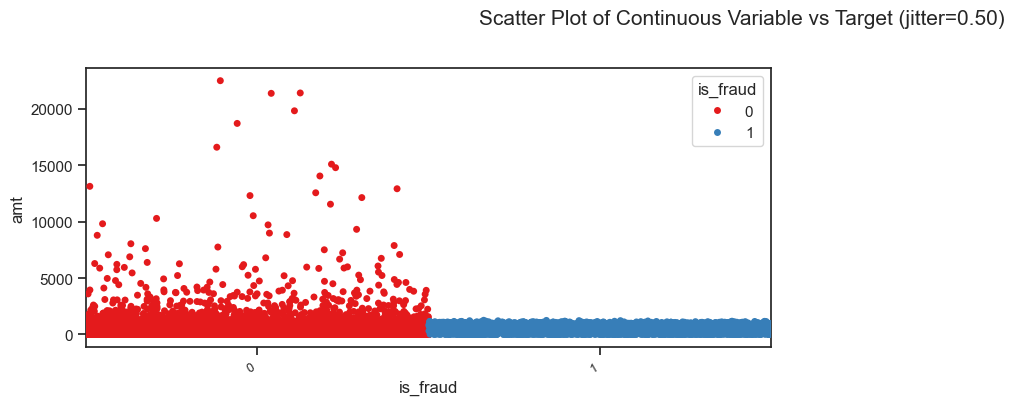

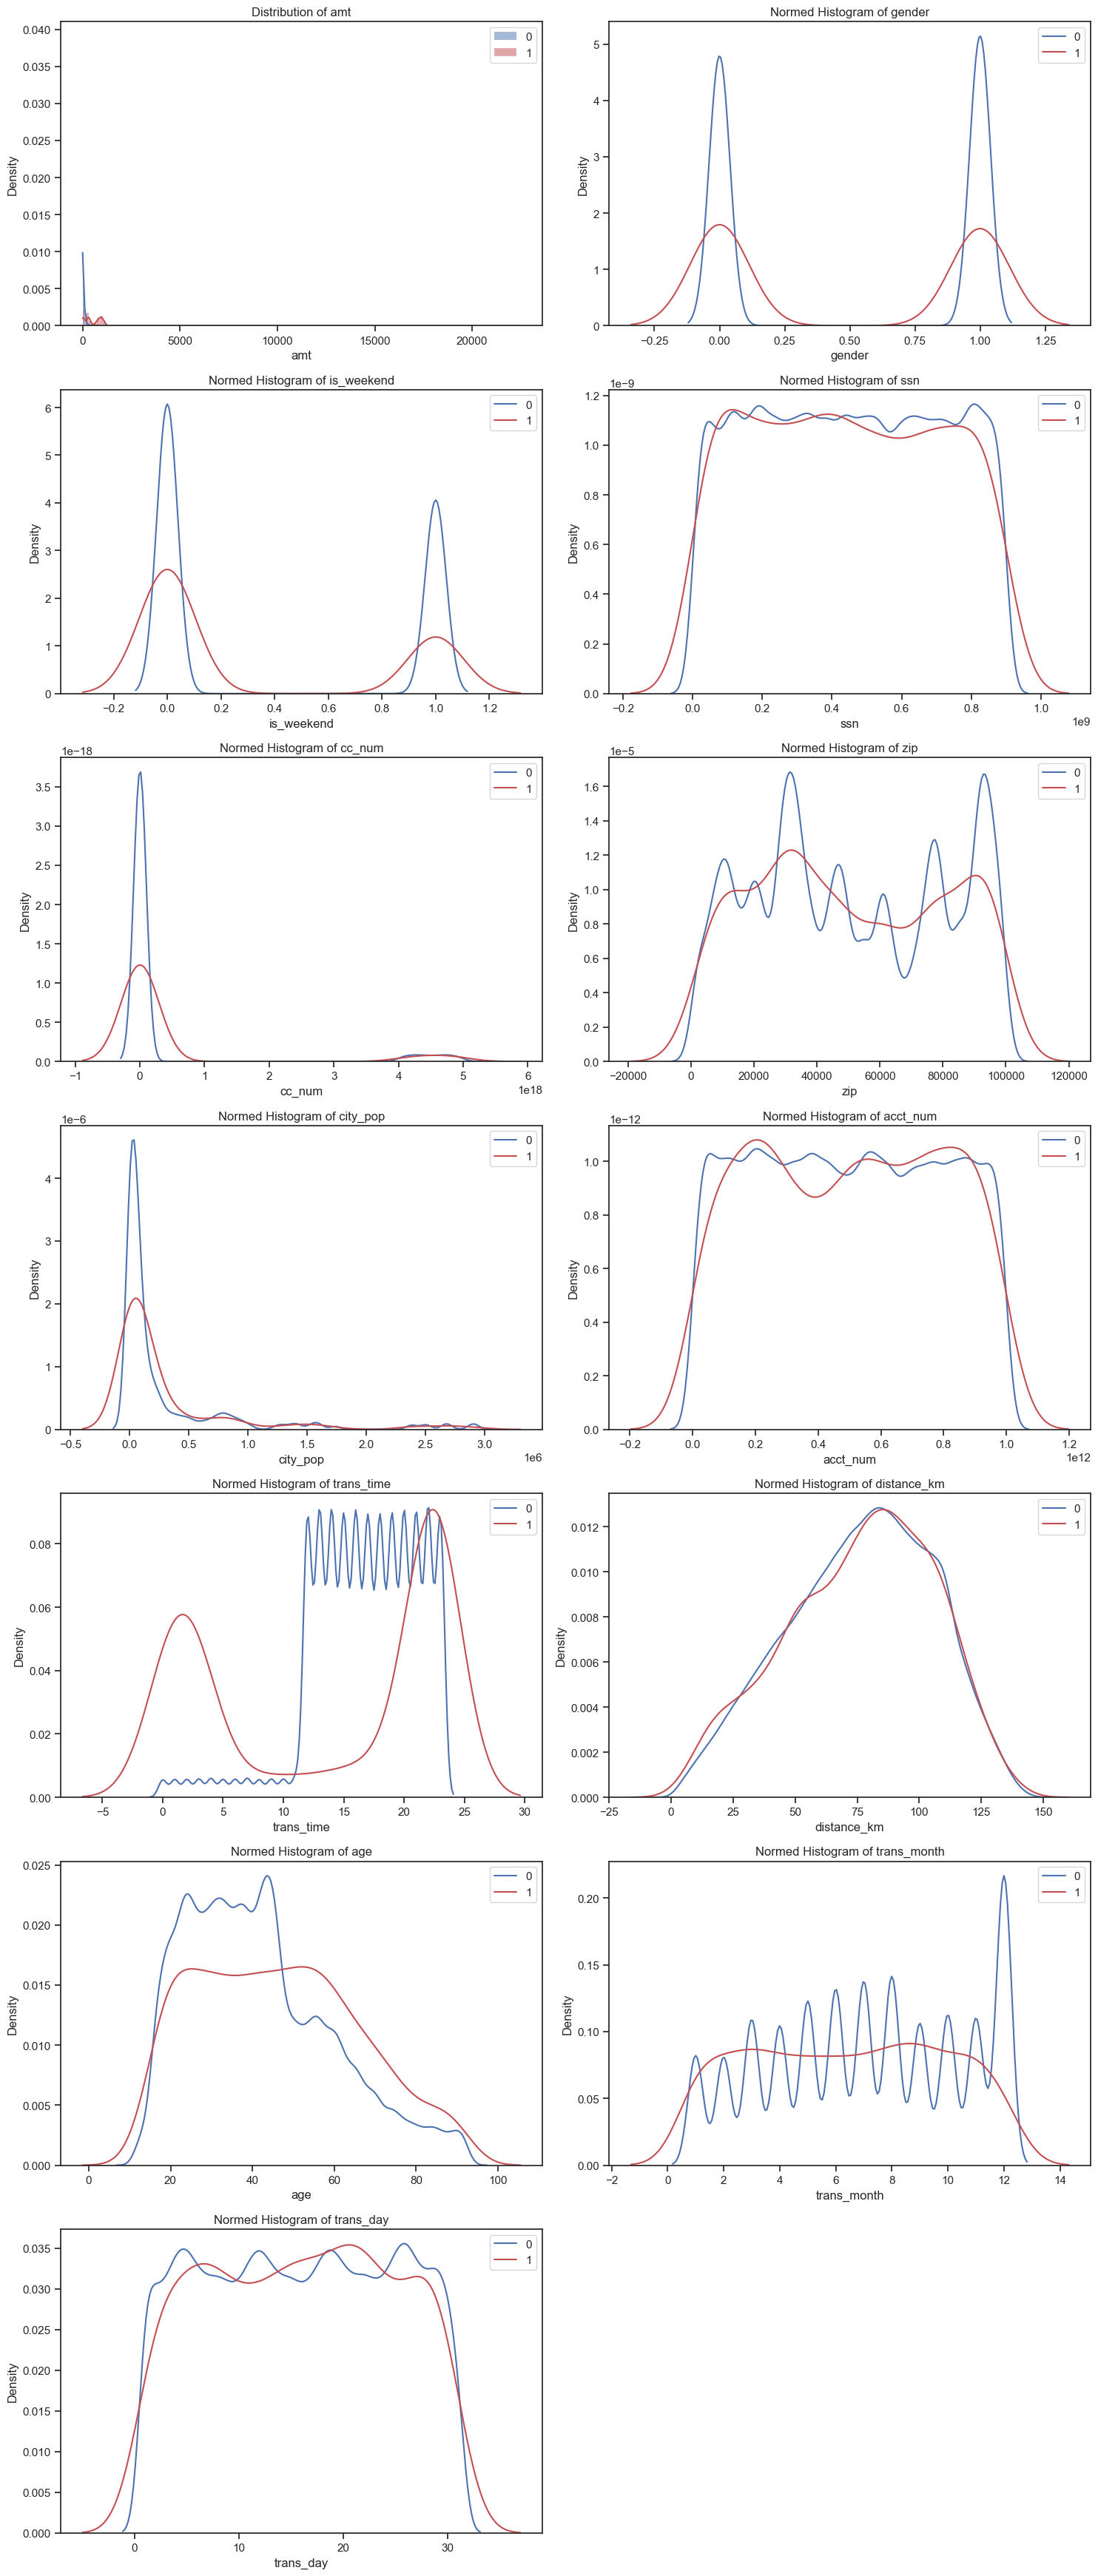

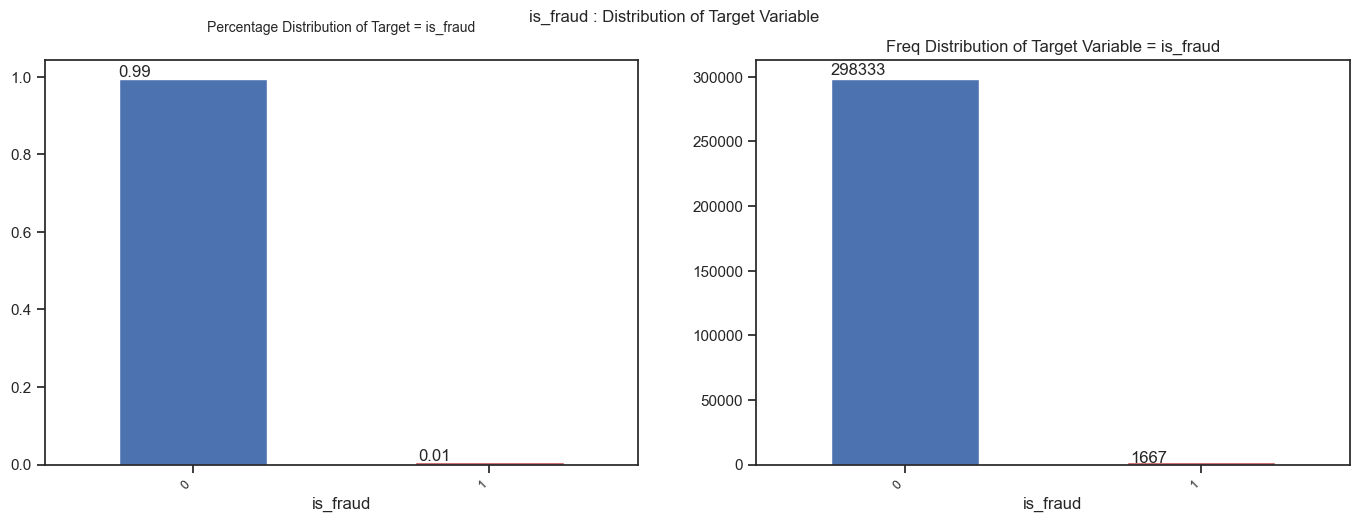

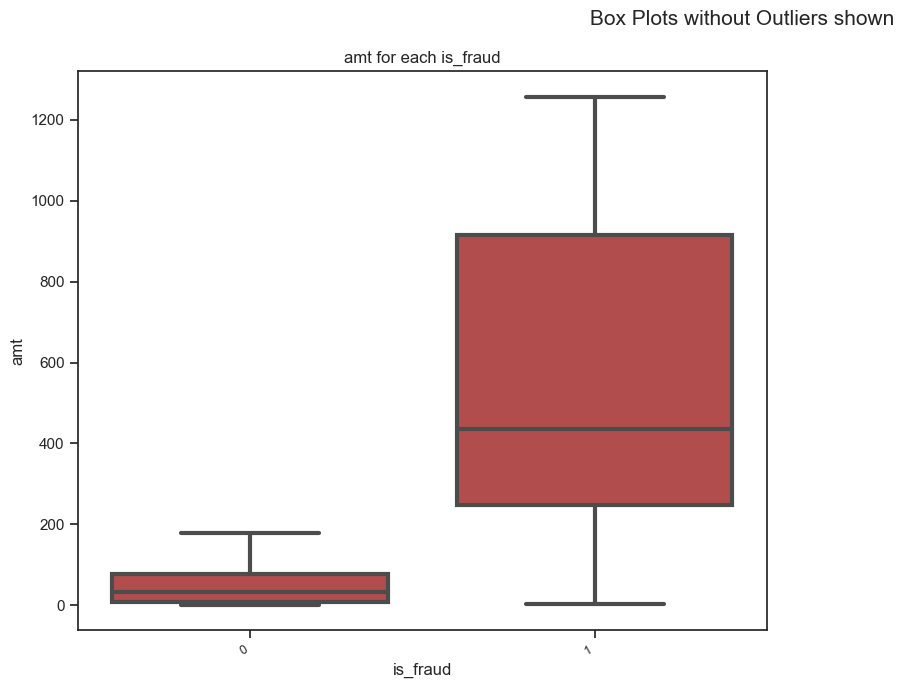

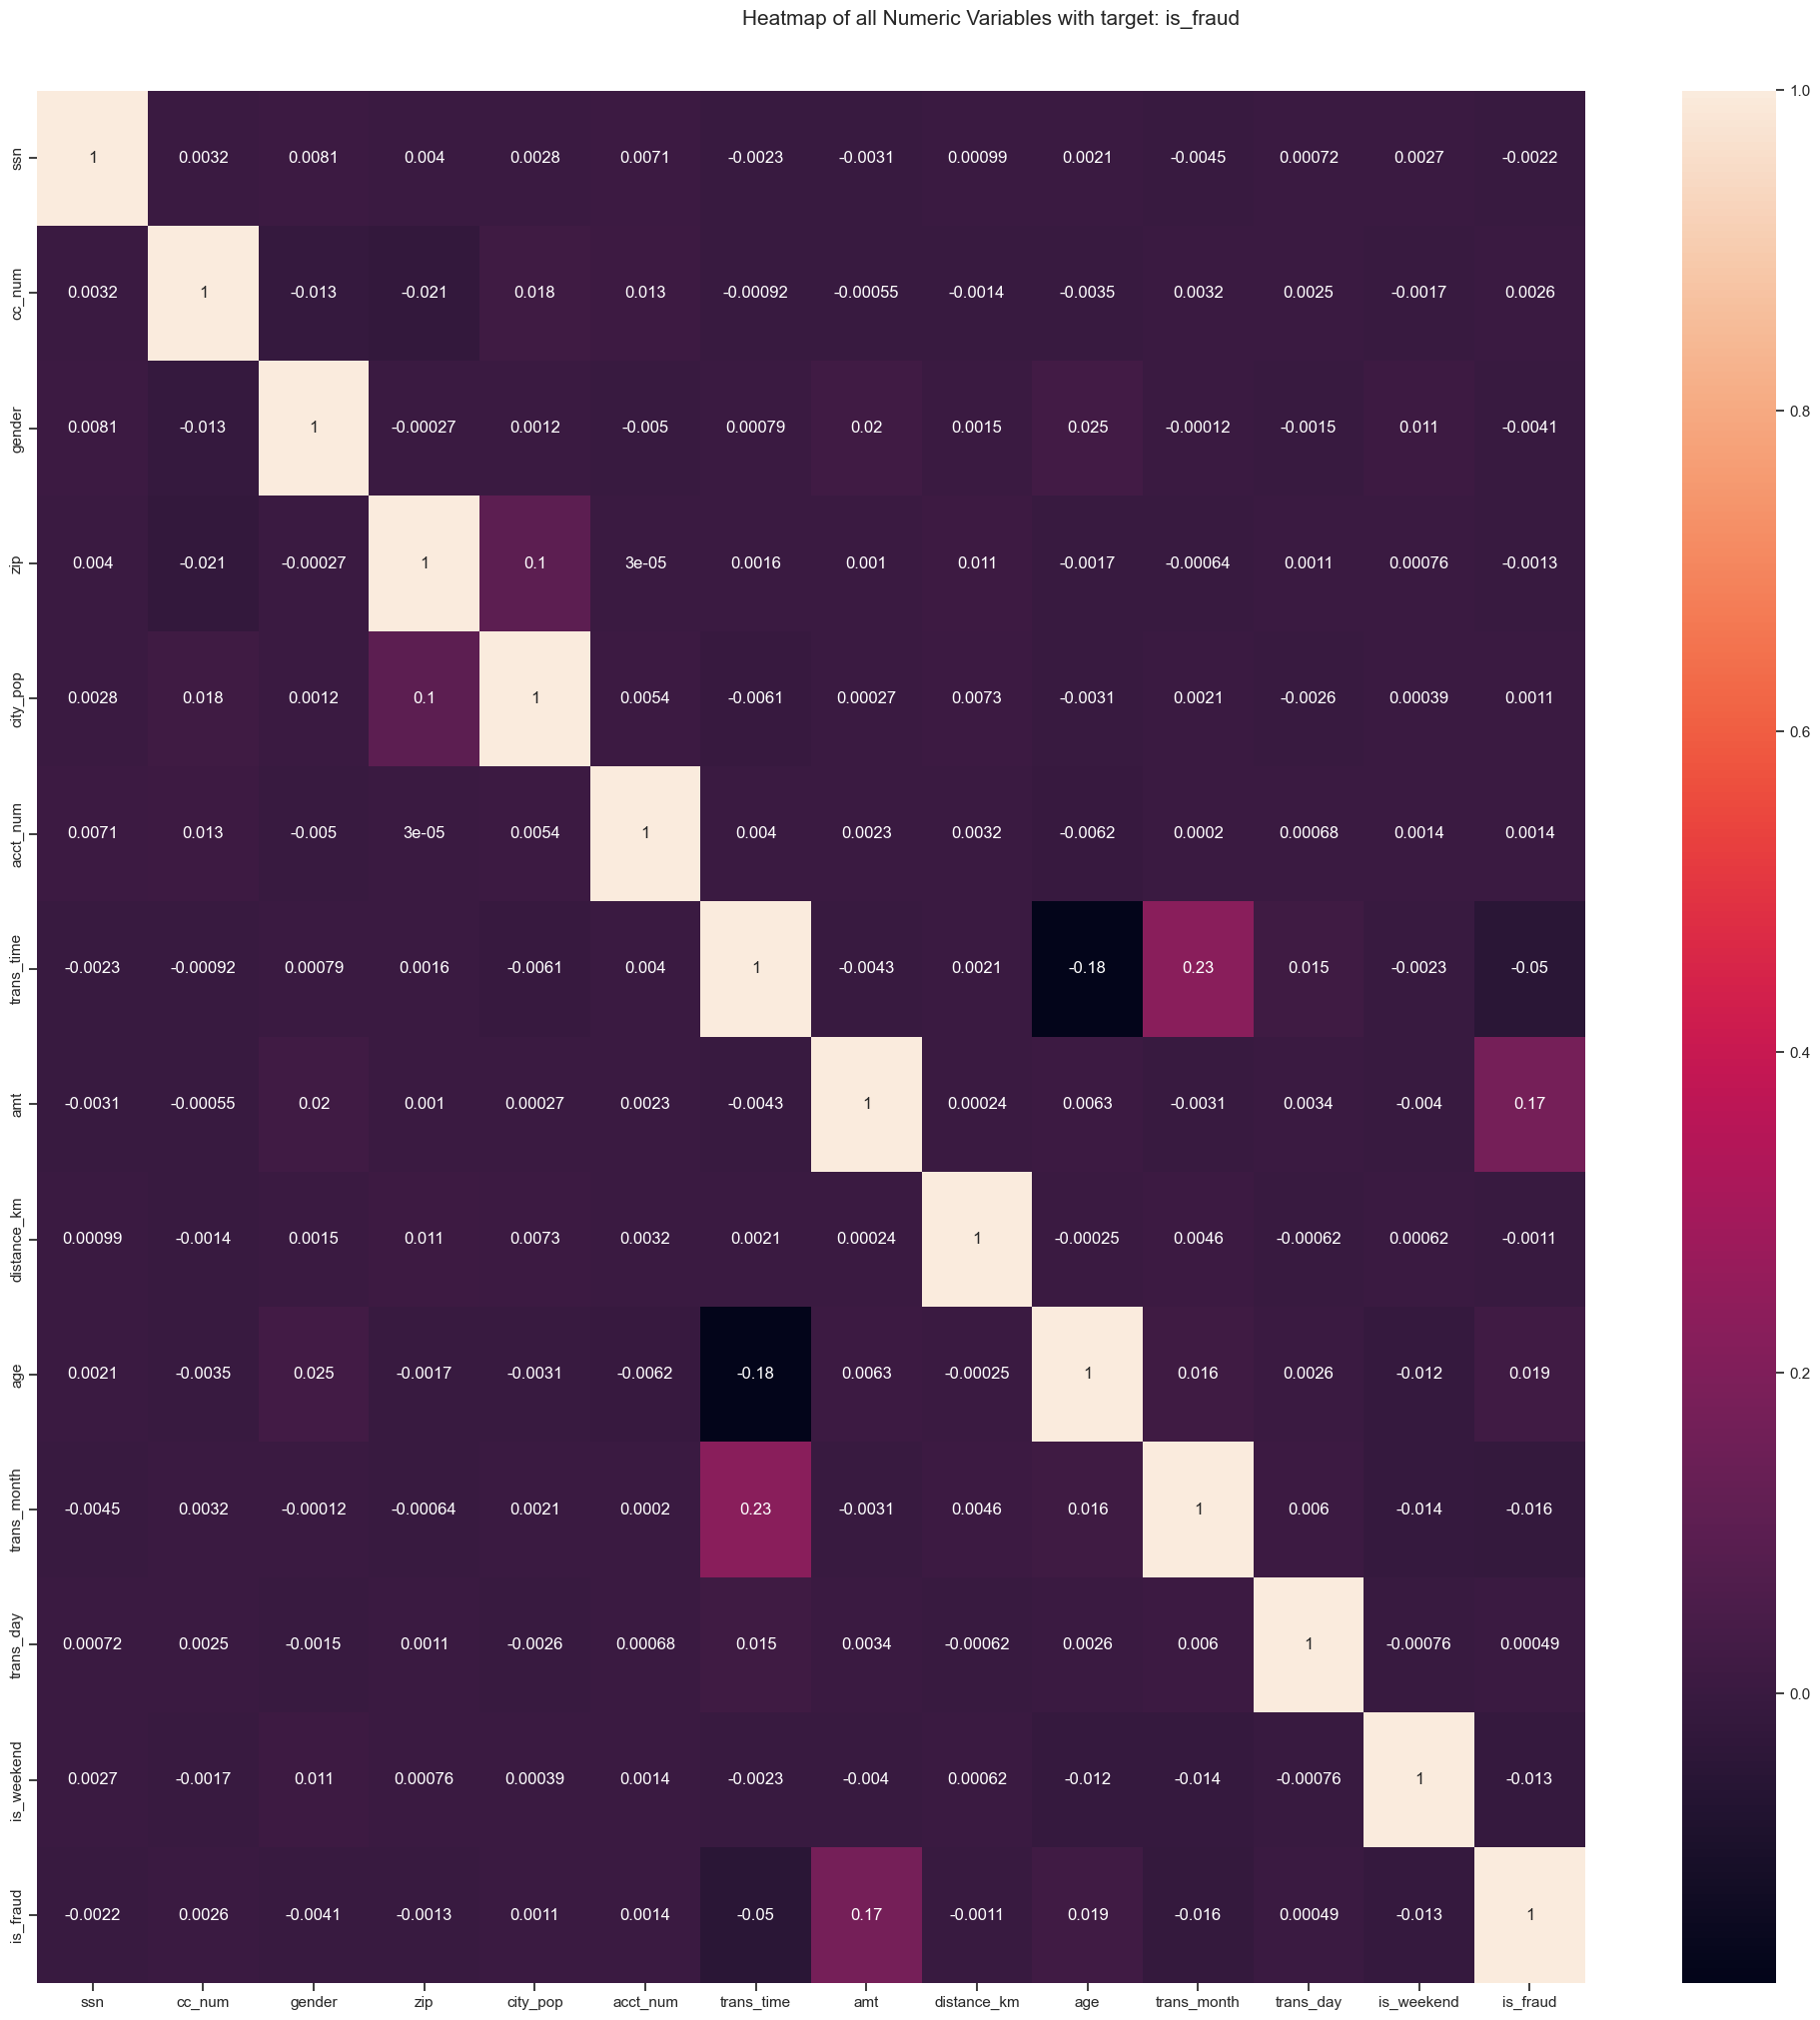

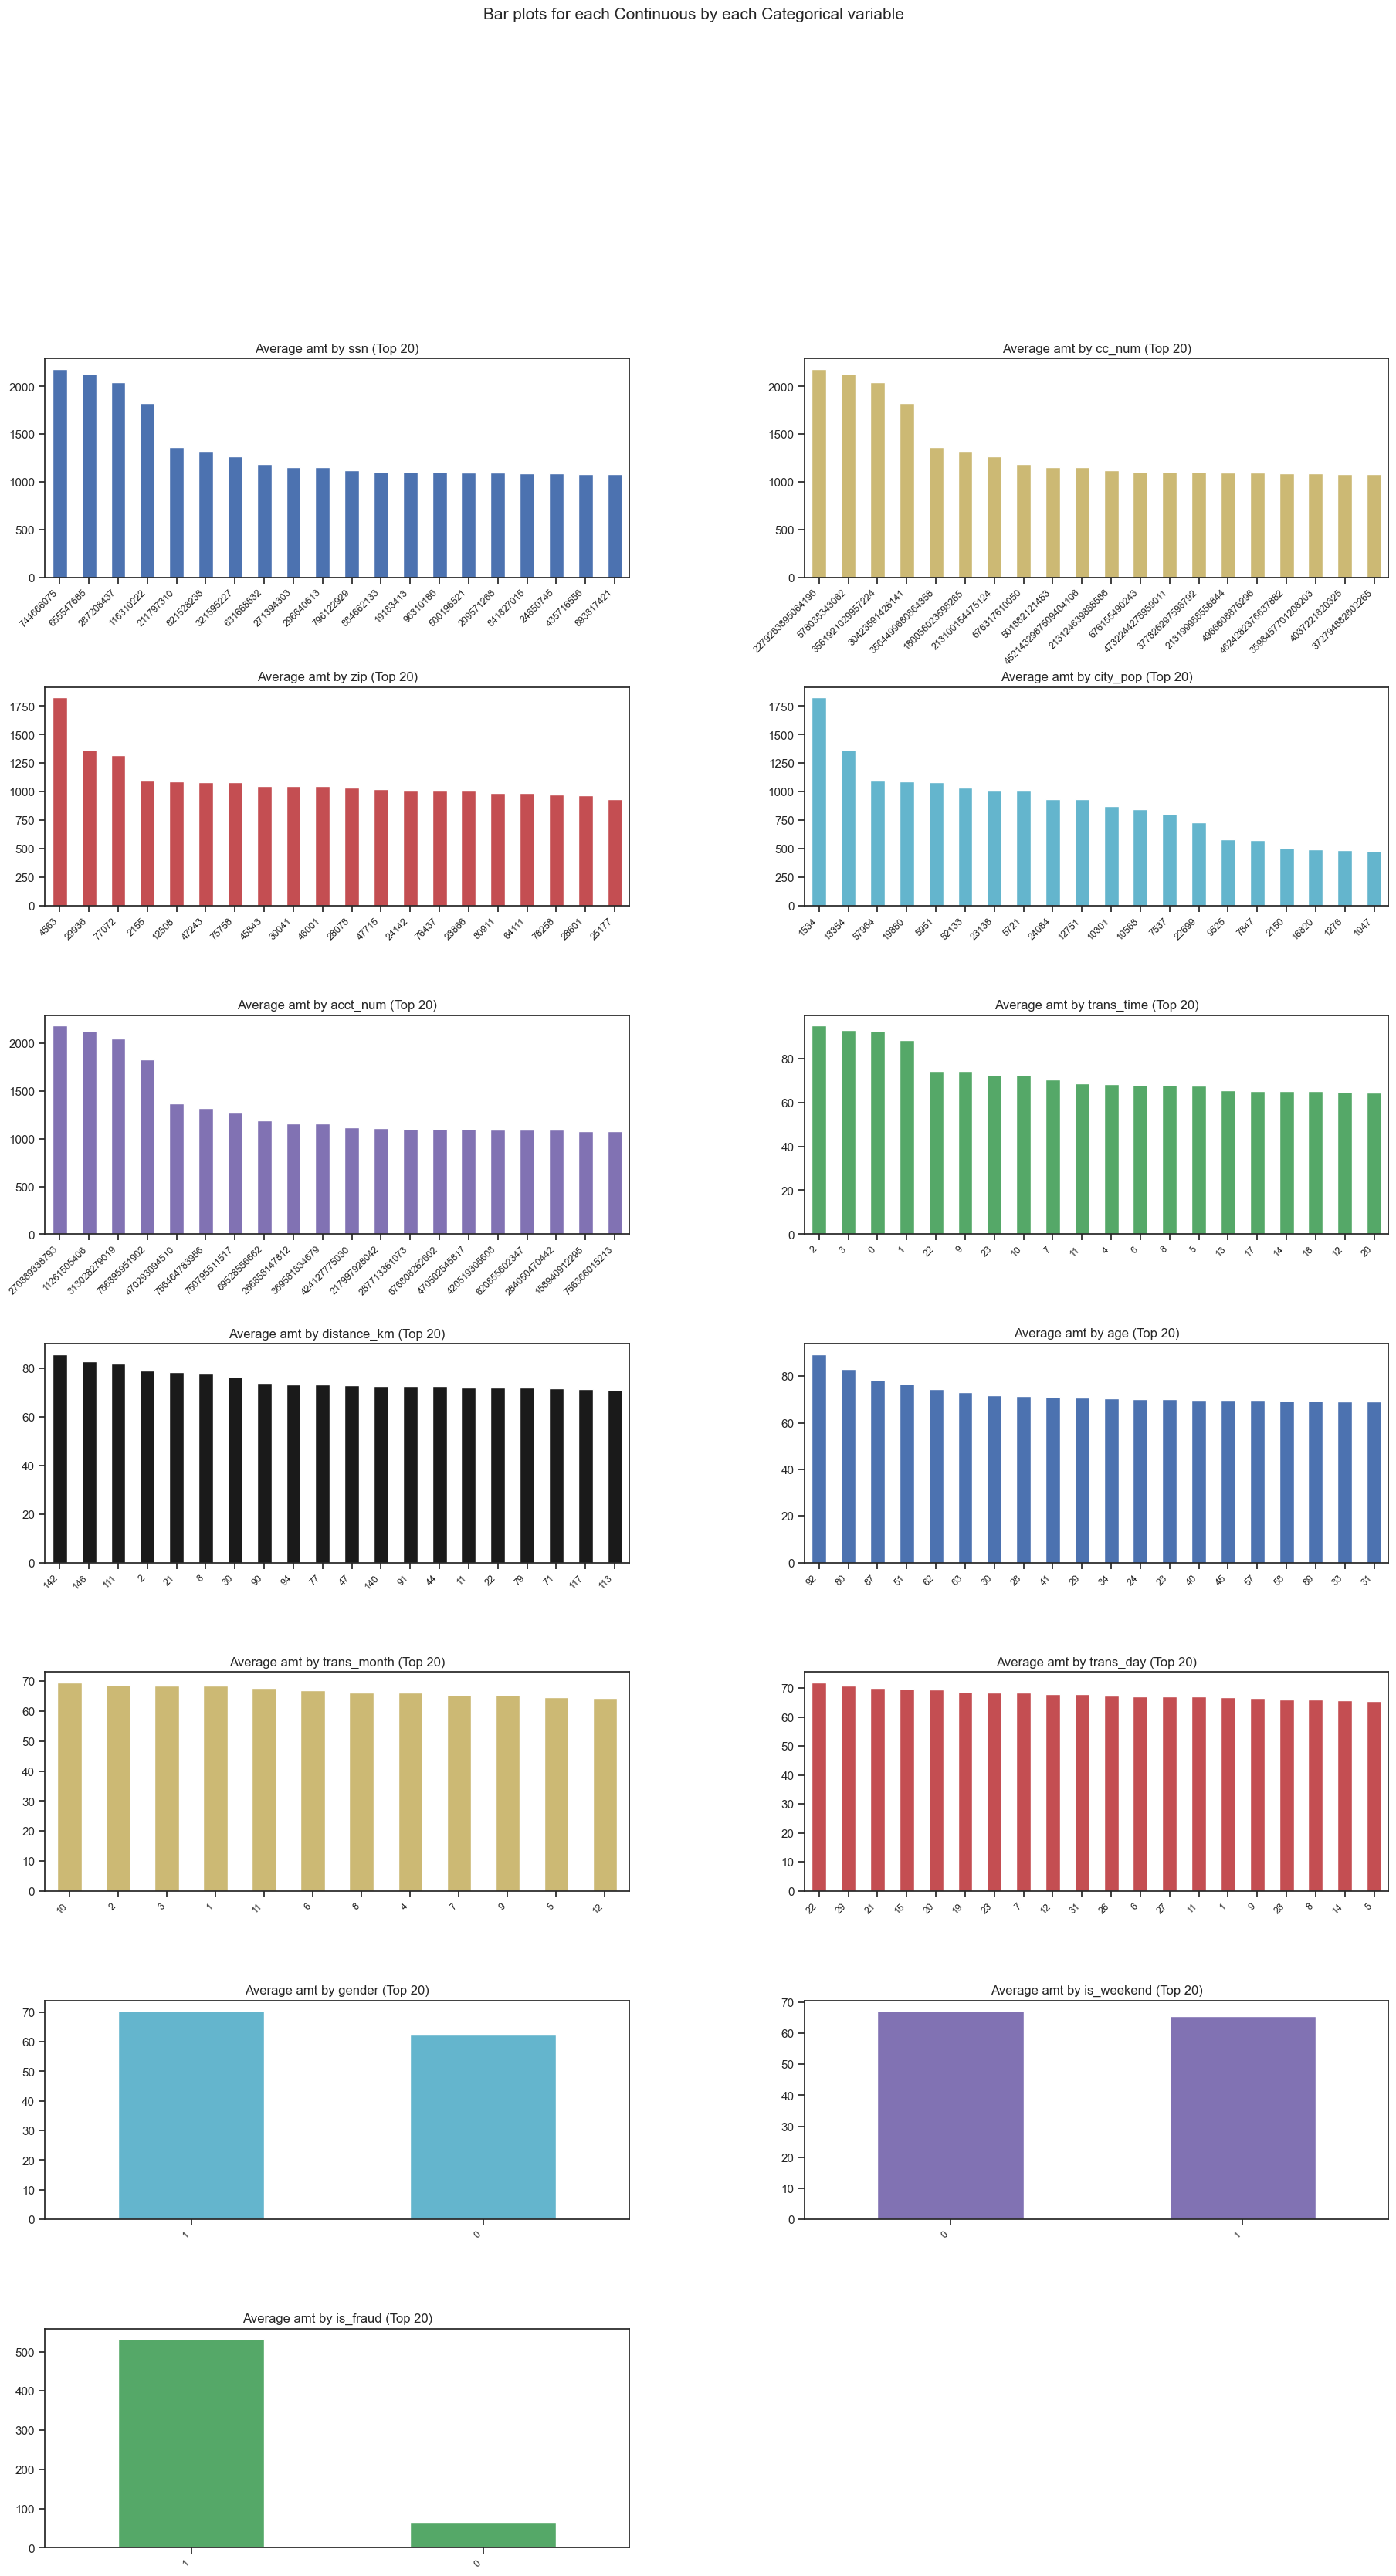

All Plots done
Time to run AutoViz = 74 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


ssn           cc_num         gender       state          zip   \
112692  754957814     3536789537928066     1                IL-OH  60616   
19498   492832812     3520291726513427     0                IL-OH  60015   
31689   204594139     4980445034440688     1          AZ-NV-CO-UT  85297   
231780  379453225     2291633340357393     1                IL-OH  61853   
4298    118859393      213183283026174     0                   CA  95687   
...           ...                  ...     ...                ...    ...   
211543  462731124      340661158387835     1                PA-NJ  19140   
86293   239737500     2703503070720528     1          MI-IN-MN-WI  47303   
122579  383976803      180031024264597     0     Low-Volume Mixed  74066   
152315  745075558     3564993102399126     0    TN-KY-AL-LA-MS-AR  70431   
117952  244205681  4899565601851813496     0    TN-KY-AL-LA-MS-AR  38587   

        city_pop                   job                      acct_num    \
112692   2680484         Engineering & Technical Experts   99075178689   
19498      26800        Medical & Healthcare Specialists   65363732290   
31689     211167         Finance & Banking Professionals   81924113349   
231780     13206      Education & Research Professionals  968884689433   
4298       99475            Legal & Policy Professionals  737428214512   
...          ...                                     ...           ...   
211543   1526206      Education & Research Professionals  874320863078   
86293      93768     Psychology & Social Service Workers  355200759851   
122579     31060     Psychology & Social Service Workers   16352895835   
152315      5366  Miscellaneous & Low-Transaction Trades  341538865212   
117952      1301      Education & Research Professionals  548044814467   

                profile                      trans_num              \
112692  adults 2550 female urban  39a4e6a31d29b9ed1e9efbd64cb2875f   
19498     adults 50up male urban  9d5bb43e9a698bc8db2024c0998d9d1c   
31689   adults 50up female urban  f096a806e547855c1387c013086f7e4f   
231780  adults 2550 female urban  63c7000827b9c90eaf788353c43f2940   
4298      adults 2550 male urban  57d147e6fb70d7be85ef1bb71f74f337   
...                          ...                               ...   
211543  adults 2550 female urban  70ee25fcf7ca559f1ca3f9f3fb85aa3d   
86293   adults 2550 female urban  606aa7aa72e8fcd002d4eb771c7b7be1   
122579    adults 2550 male urban  3a67013e7009d58605b4d7b72507df9e   
152315    adults 2550 male urban  510739d2cd7bf933a70da7ab82060798   
117952        young adults rural  84cbdc92d1d2326c3acd72210f36d28e   

        trans_time     category       amt   distance_km  age  trans_month  \
112692      17       entertainment   55.00      108      42        3        
19498        7         food_dining  106.39       92      50        3        
31689       18           kids_pets  140.65       86      50       10        
231780      22           kids_pets   39.91       44      28       11        
4298        17       personal_care   25.85       75      22       12        
...            ...             ...     ...          ...  ...          ...   
211543      18      health_fitness  131.69       45      40        6        
86293       15                home   68.75      130      30        7        
122579      13         food_dining    6.77       60      41        6        
152315      14                home  150.13       85      43        9        
117952      17      health_fitness    1.38       61      20        8        

        trans_day  is_weekend trans_time_group  is_fraud  
112692      9           0          Evening          0     
19498      11           0              Day          0     
31689       2           0          Evening          0     
231780      8           1            Night          0     
4298        2           0          Evening          0     
...           ...         ...              ...       ...  
211543     10           0     

In [18]:
%matplotlib inline

AV = AutoViz_Class()
AV.AutoViz(df, depVar="is_fraud",max_rows_analyzed=300000)
           

 ##### <font color='blue'> sweetviz

In [20]:
# Analyze and specify the target column (classification or regression)
report = sv.analyze(df, target_feat='is_fraud')

                                             |                                             | [  0%]   00:00 ->…


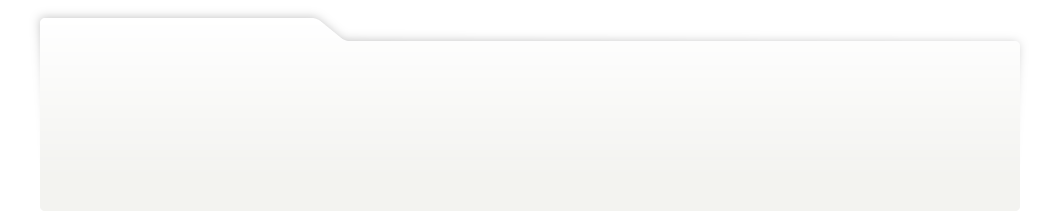
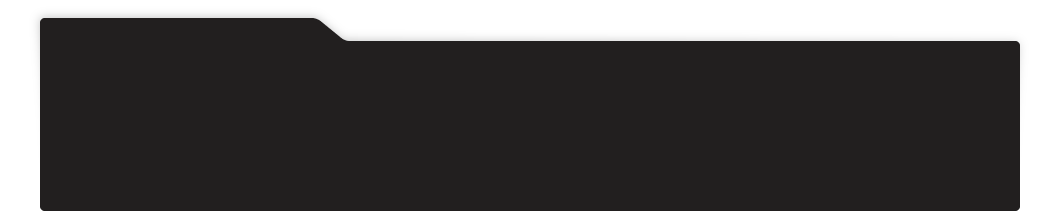
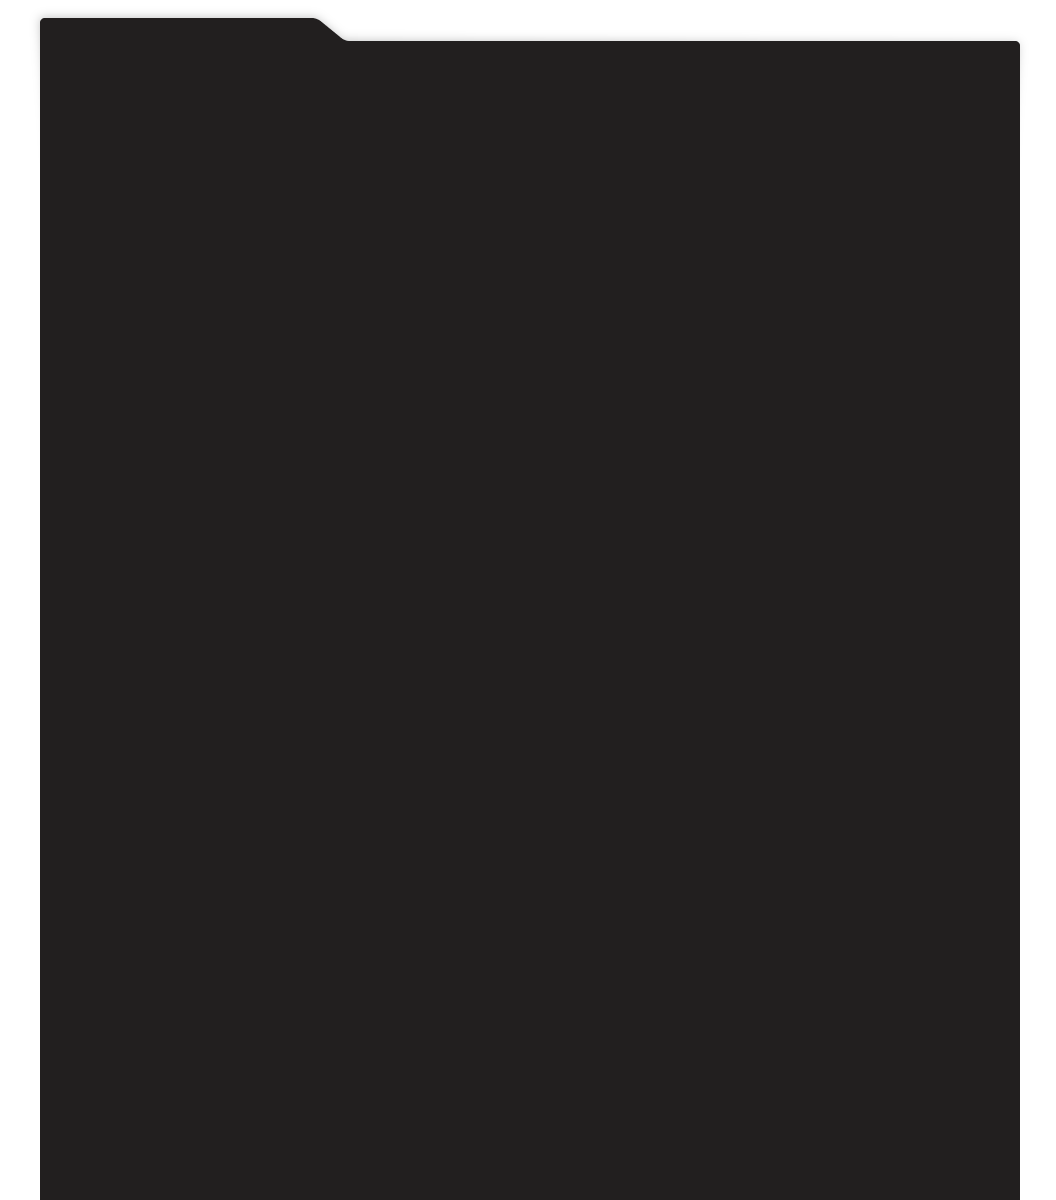
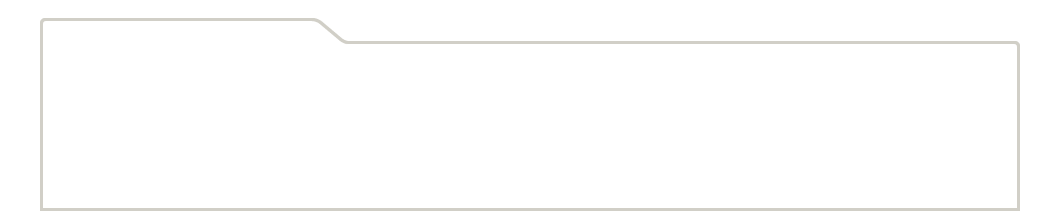
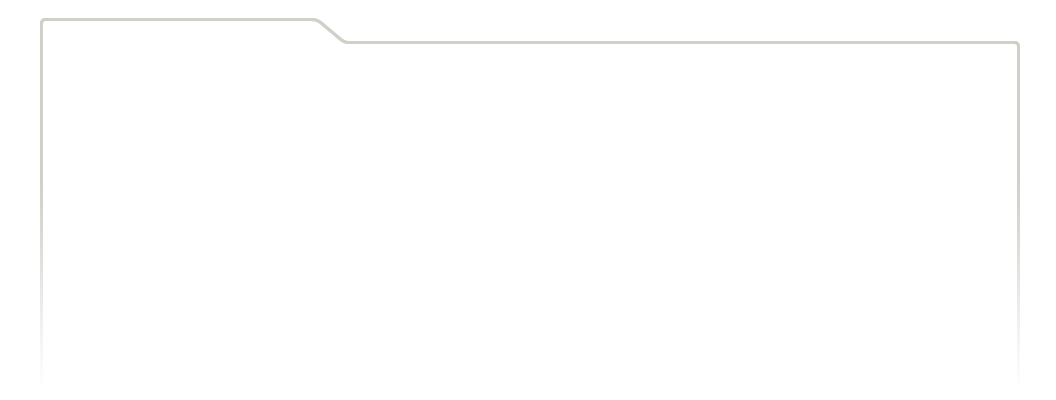
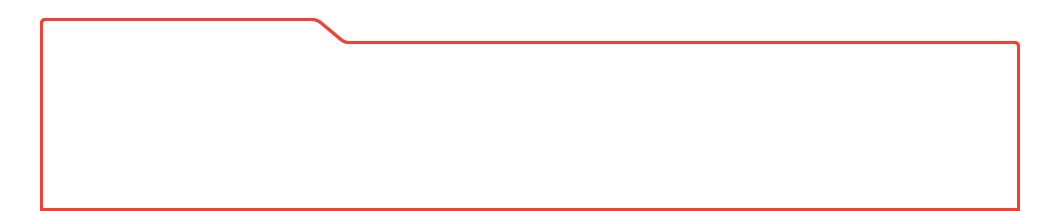
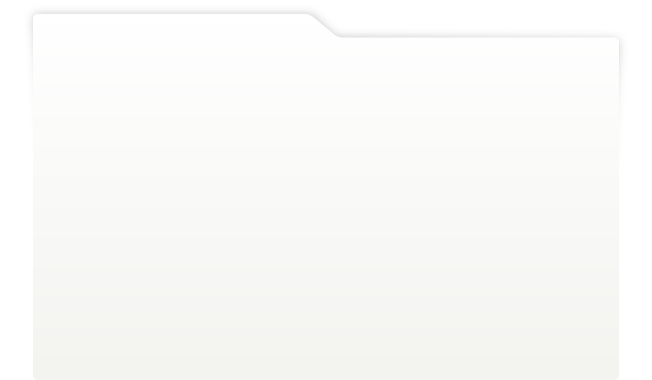
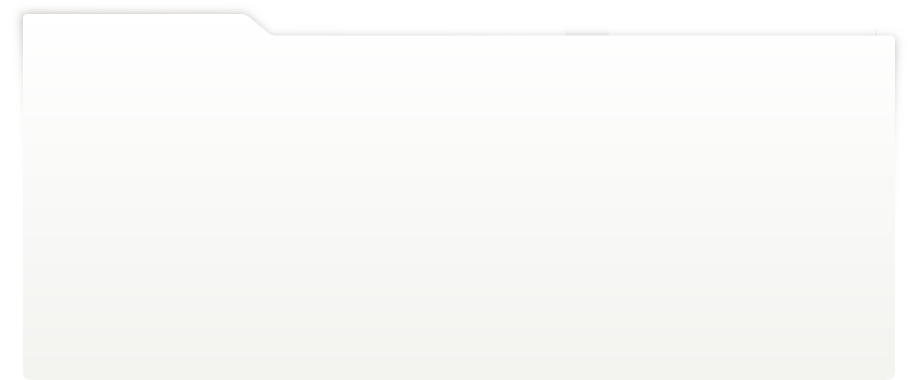
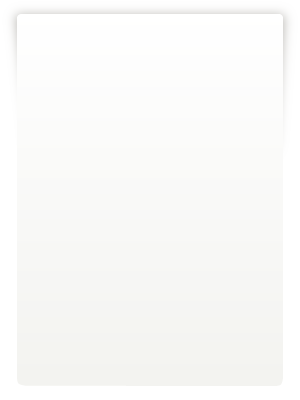
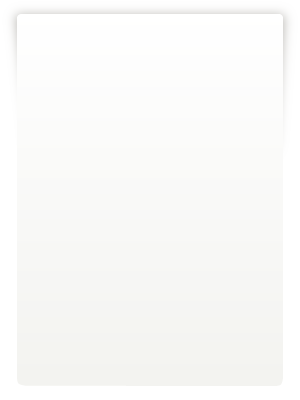
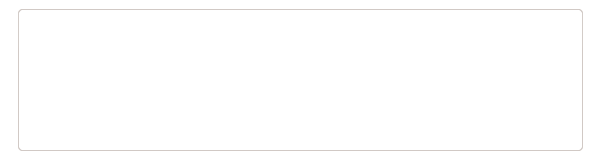
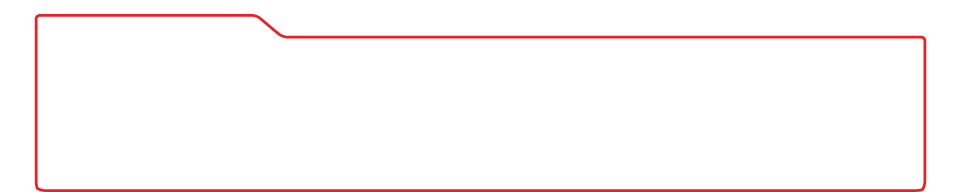
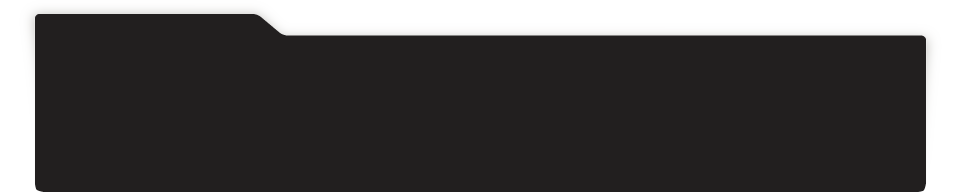
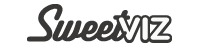
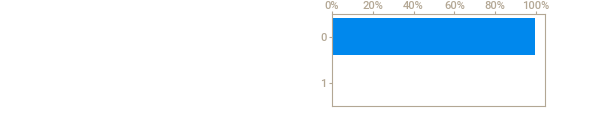
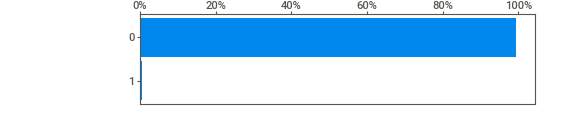
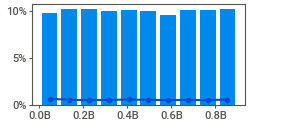
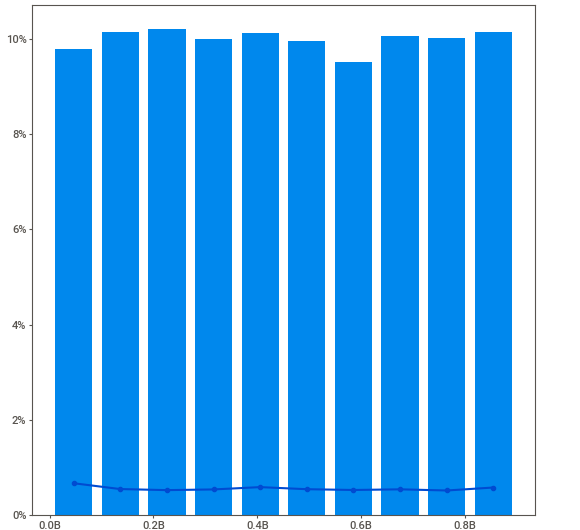
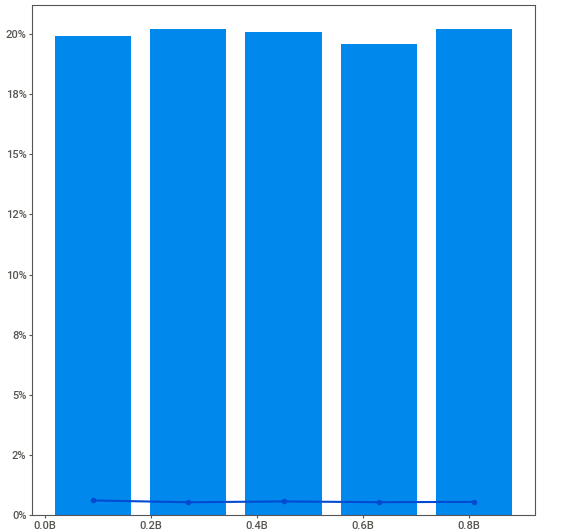
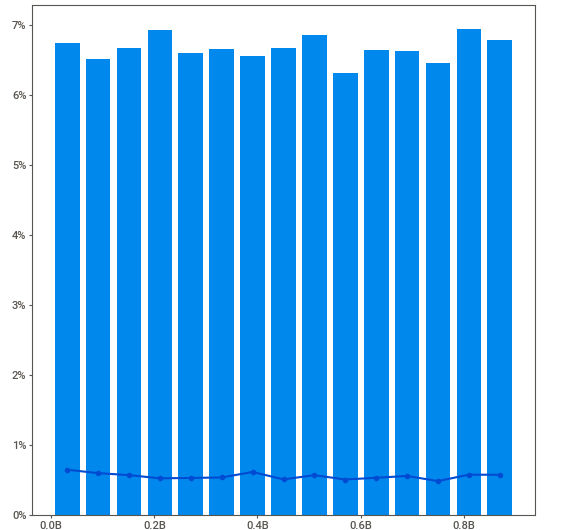
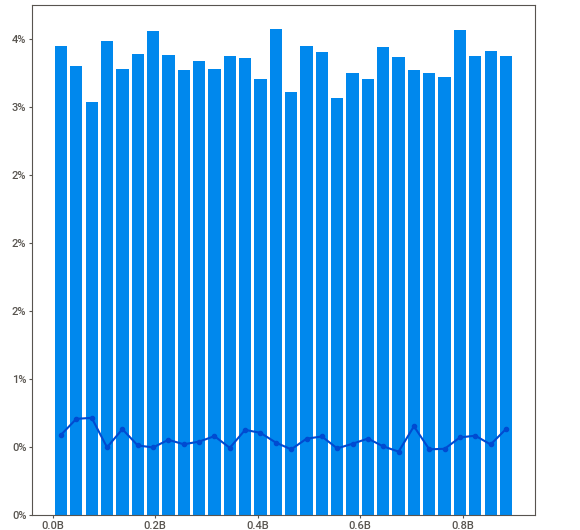
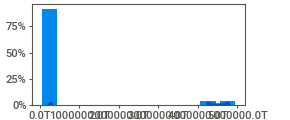
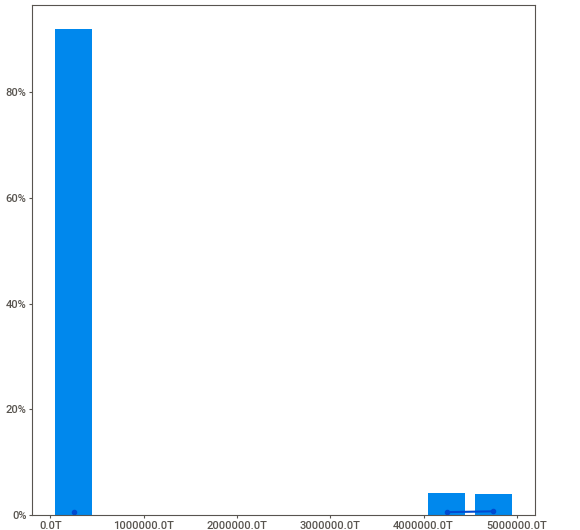
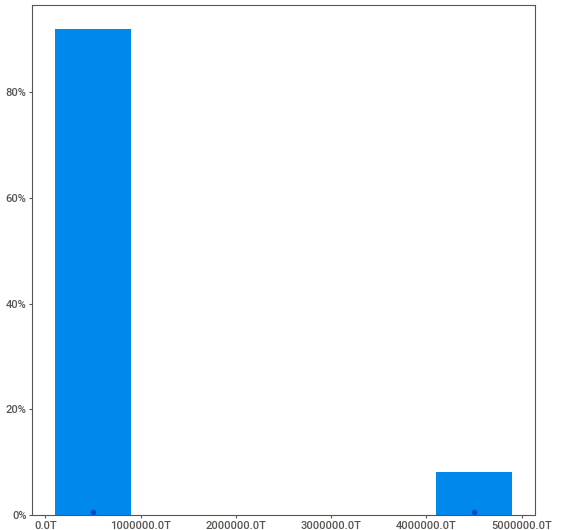
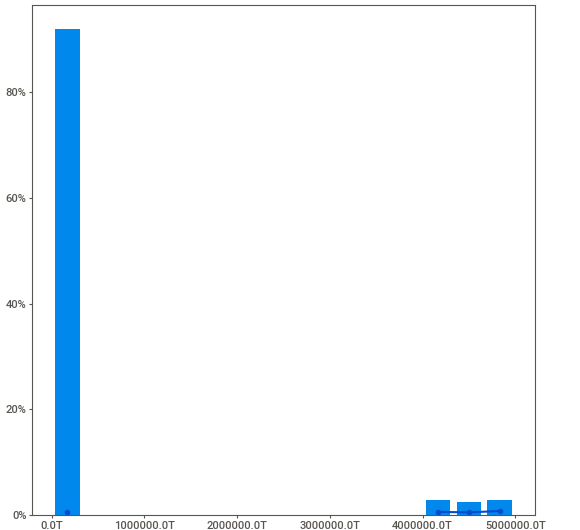
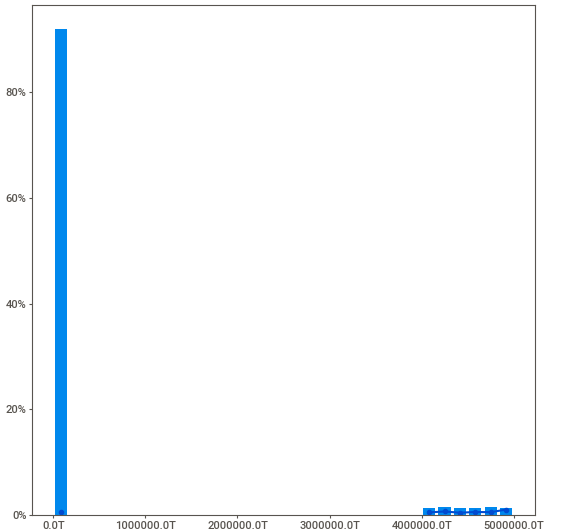
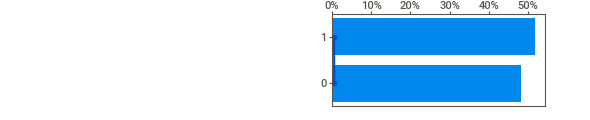
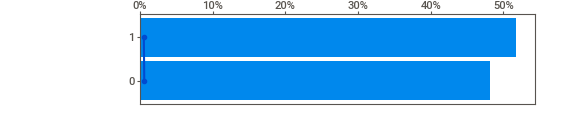
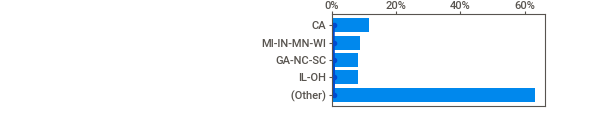
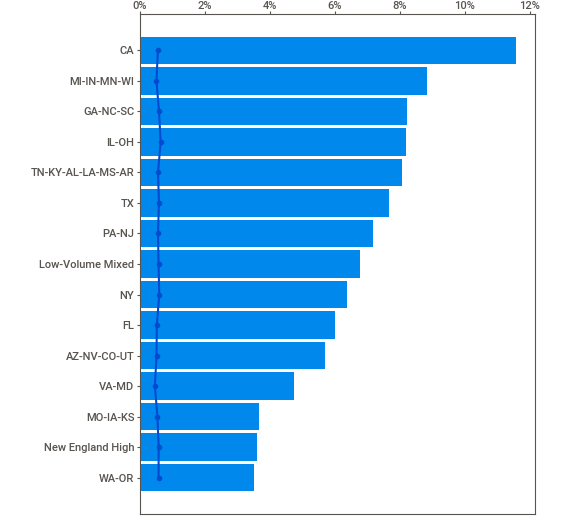
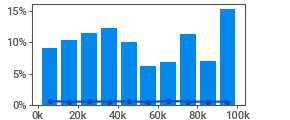
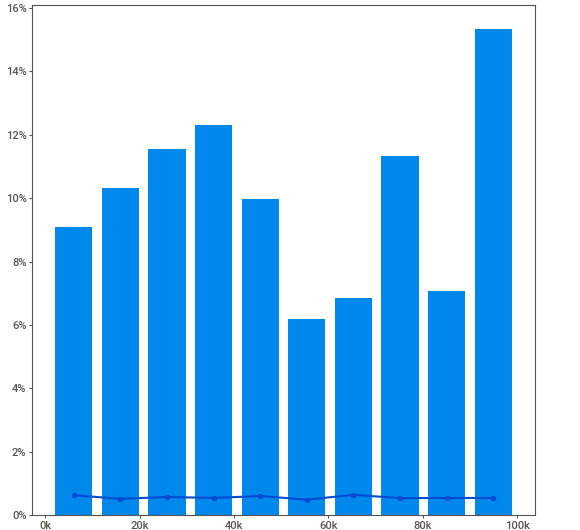
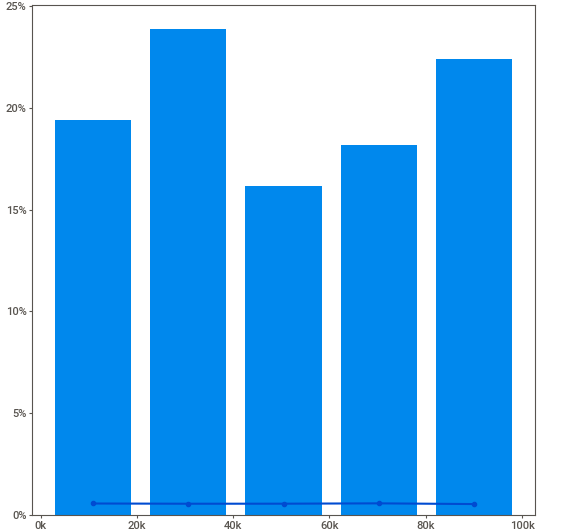
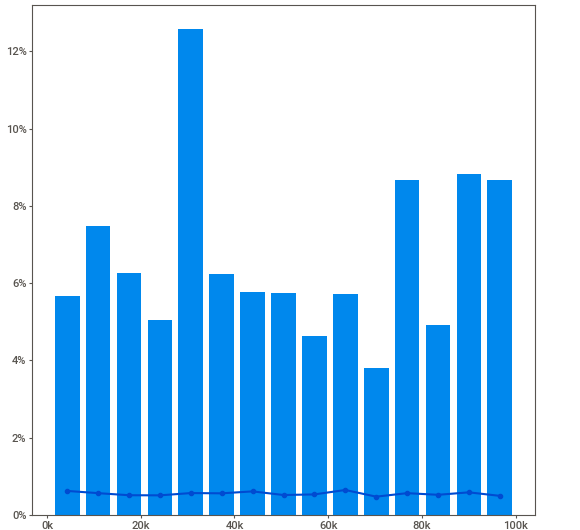
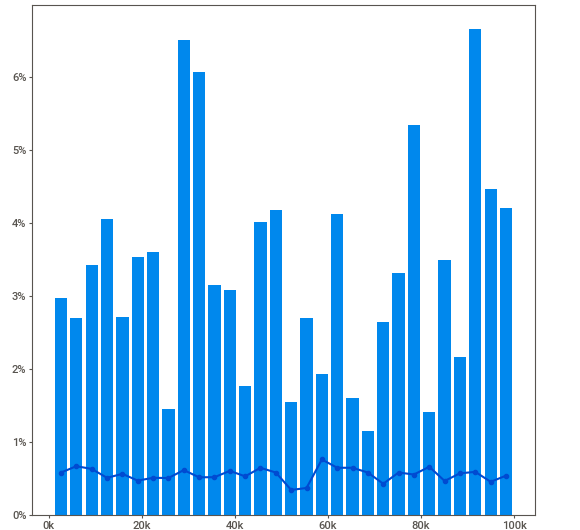
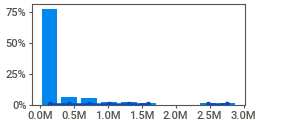
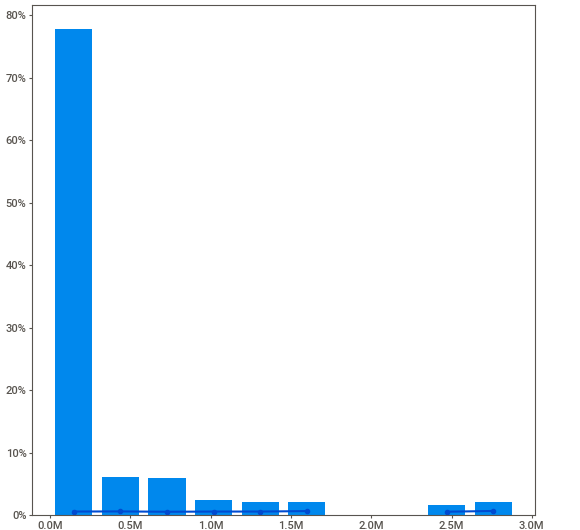
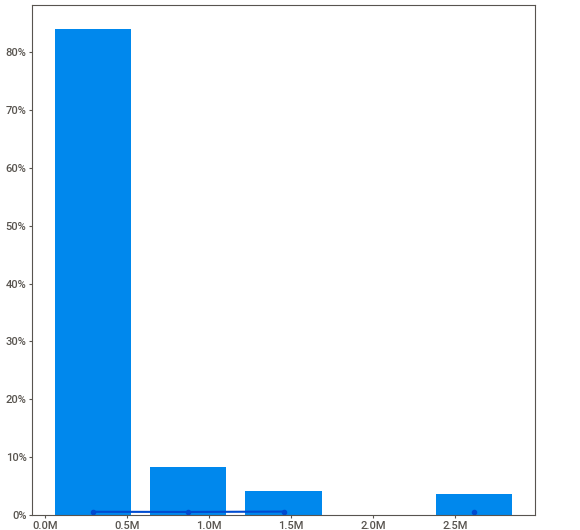
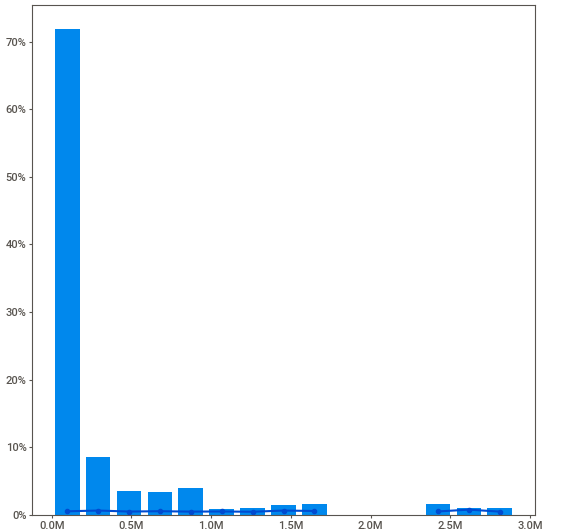
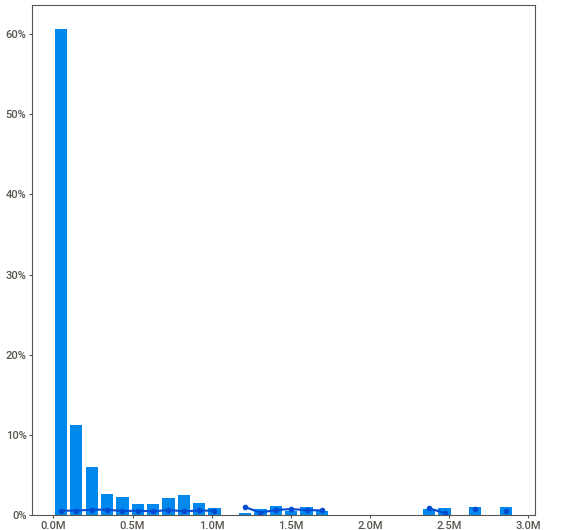
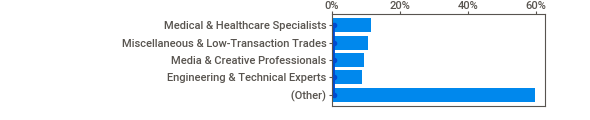
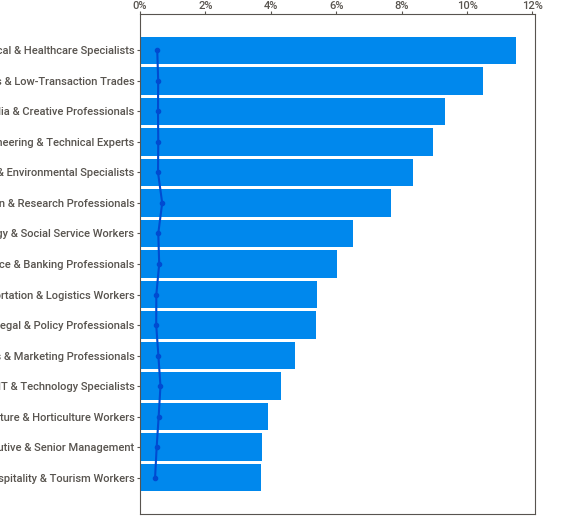
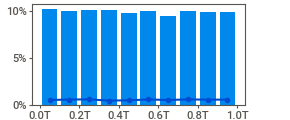
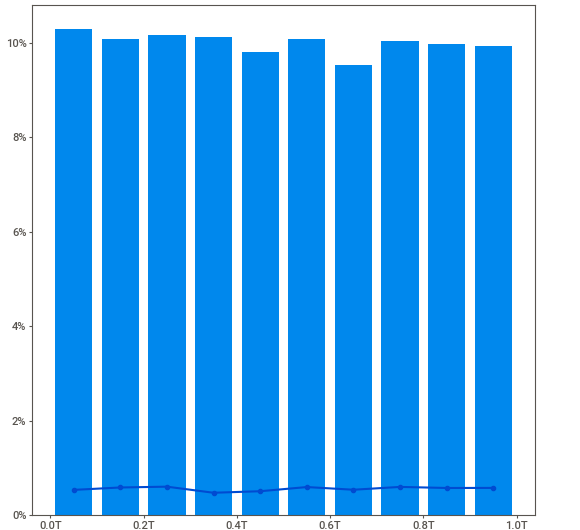
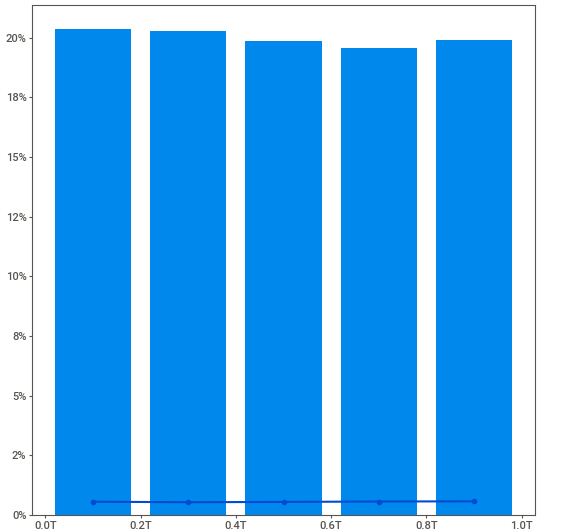
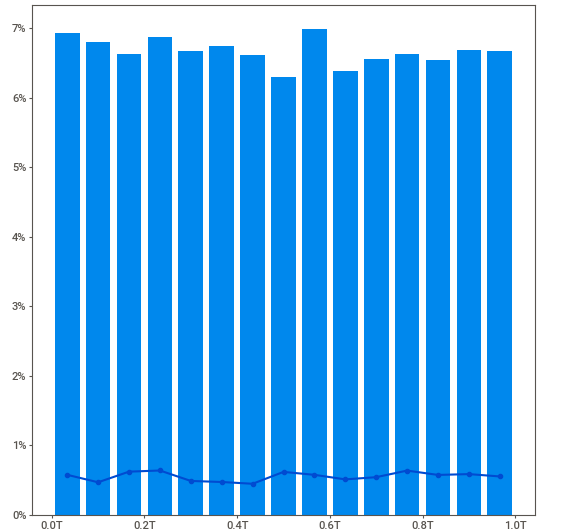
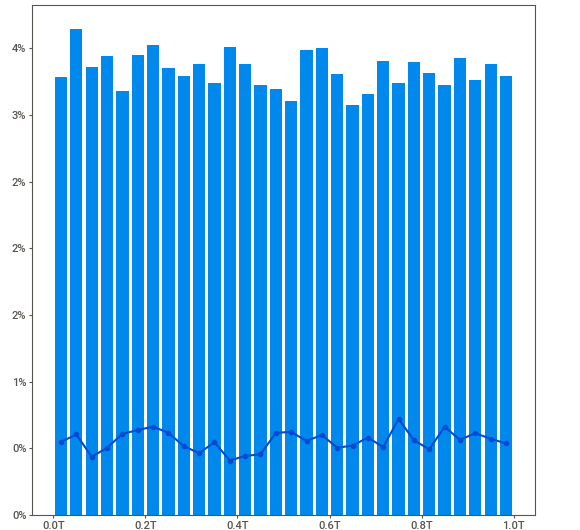
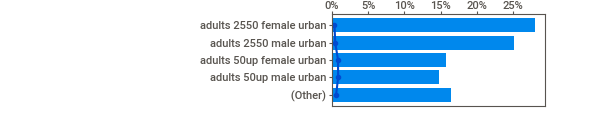
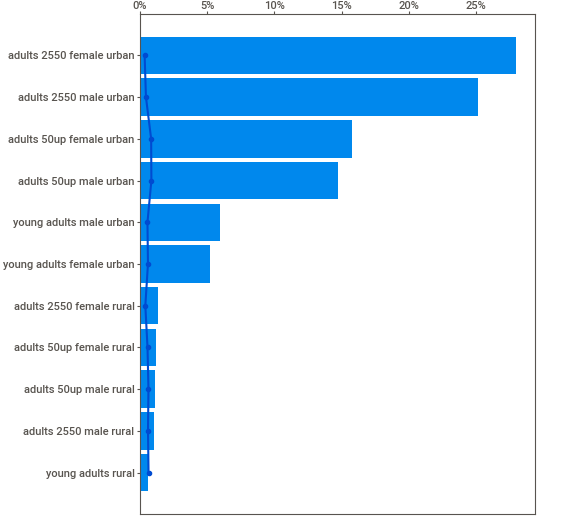
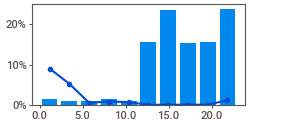
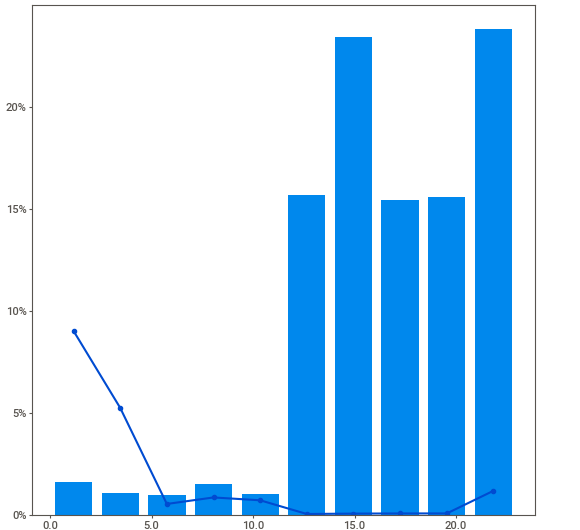
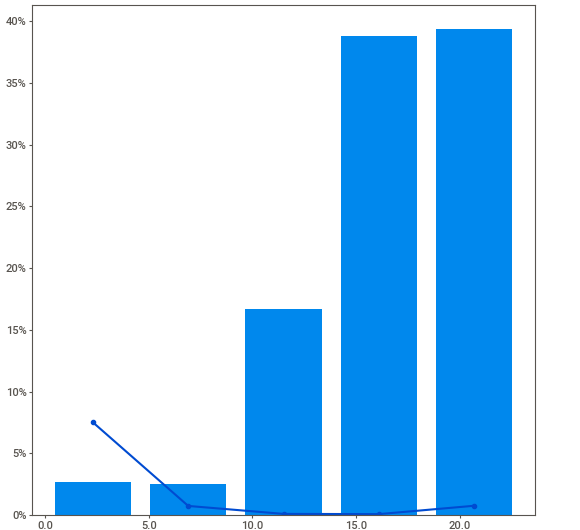
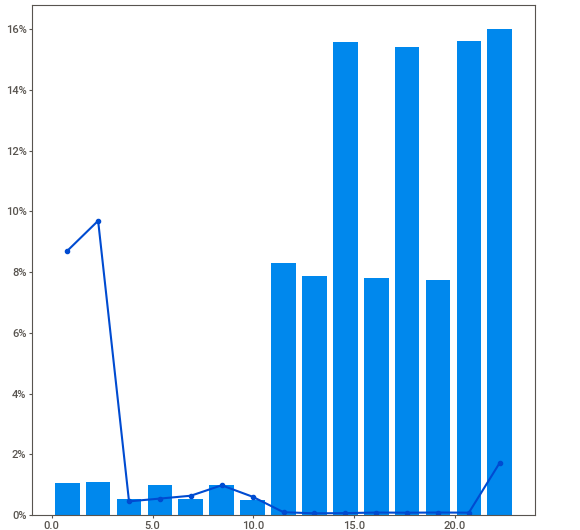
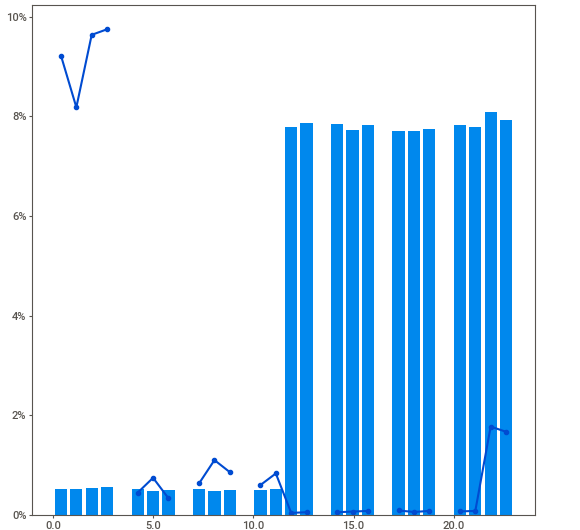
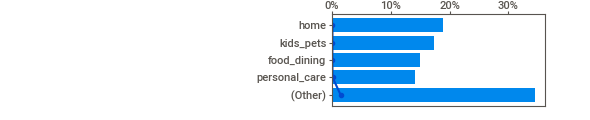
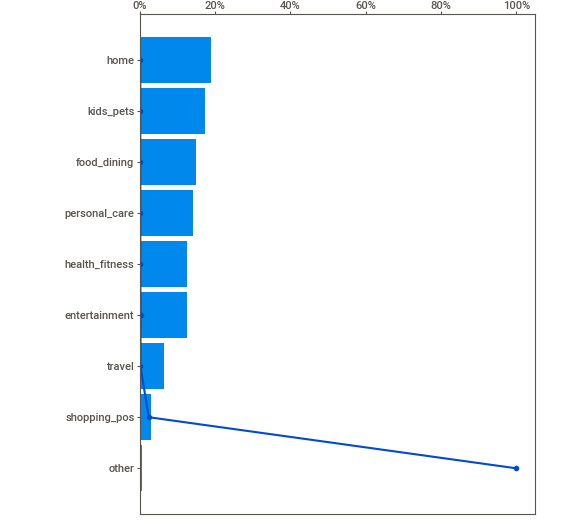
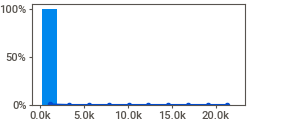
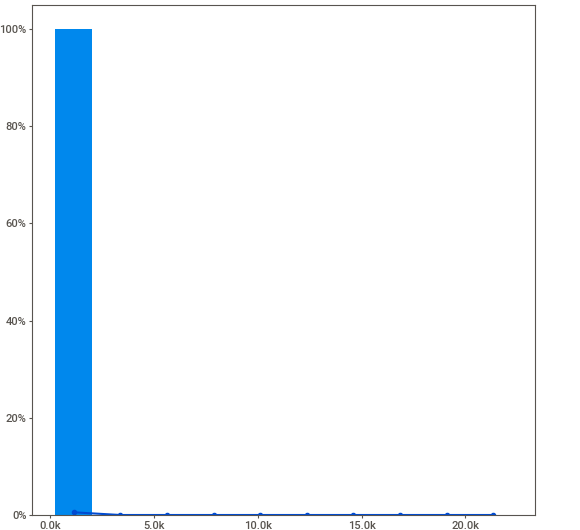
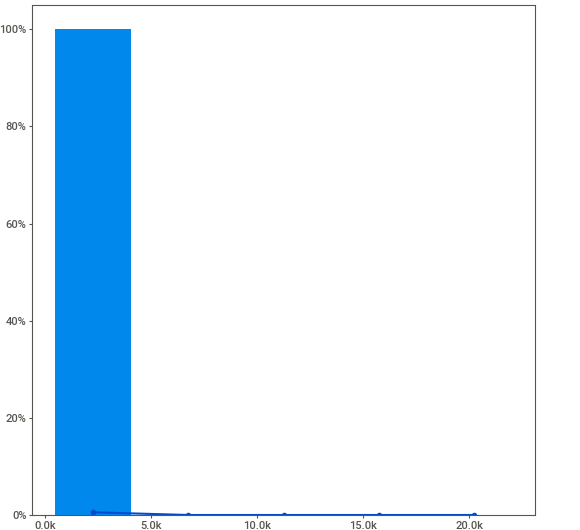
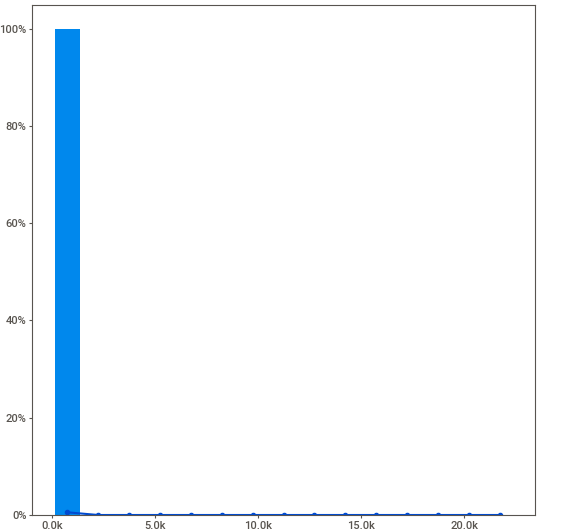
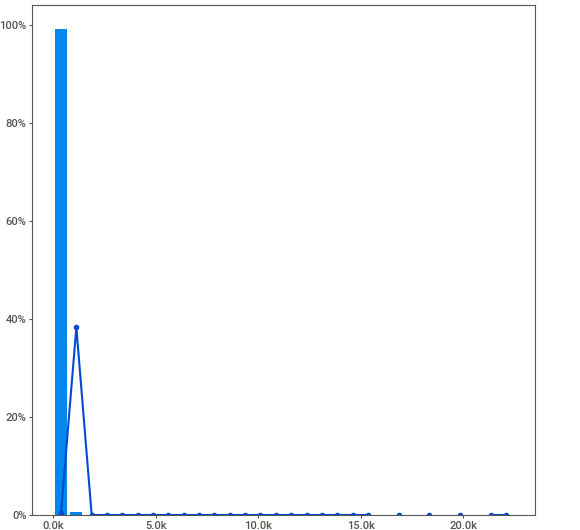
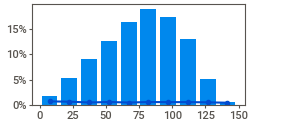
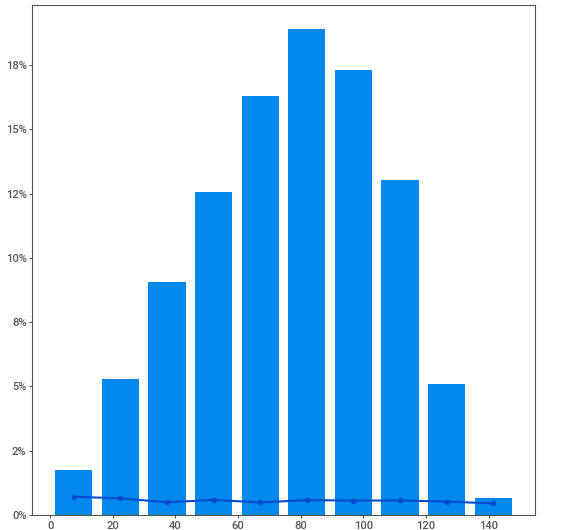
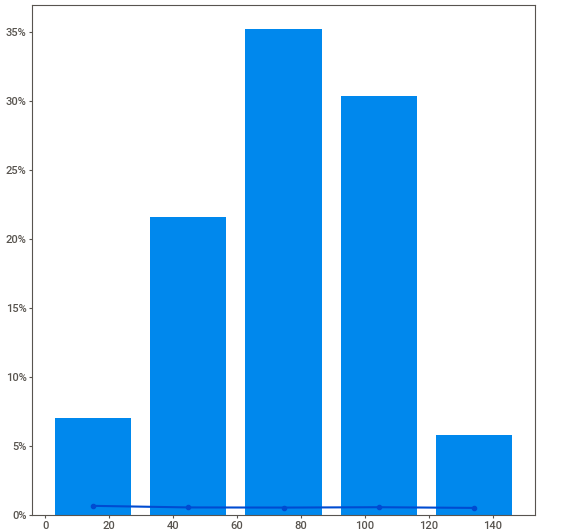
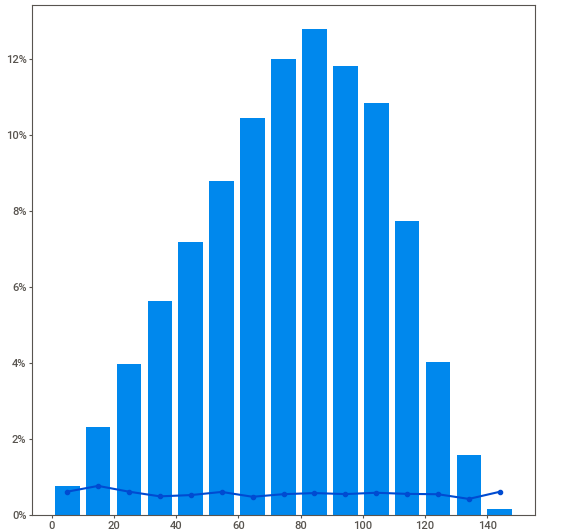
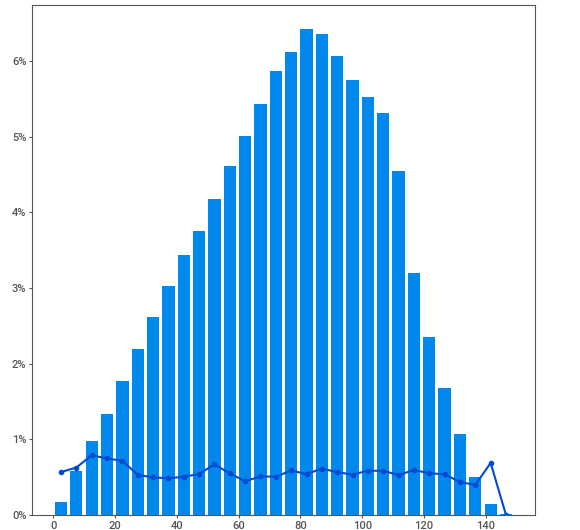
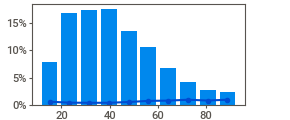
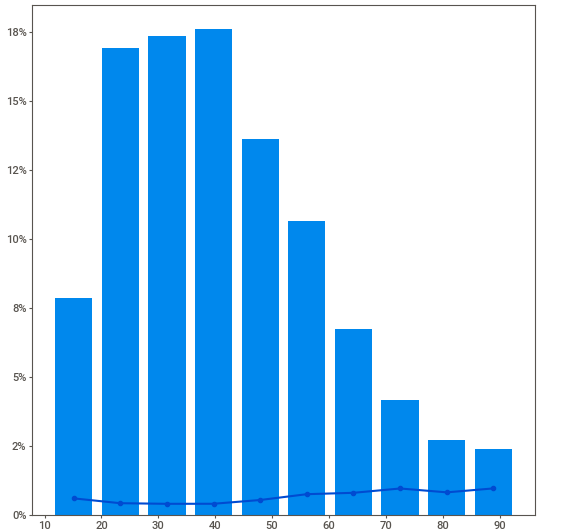
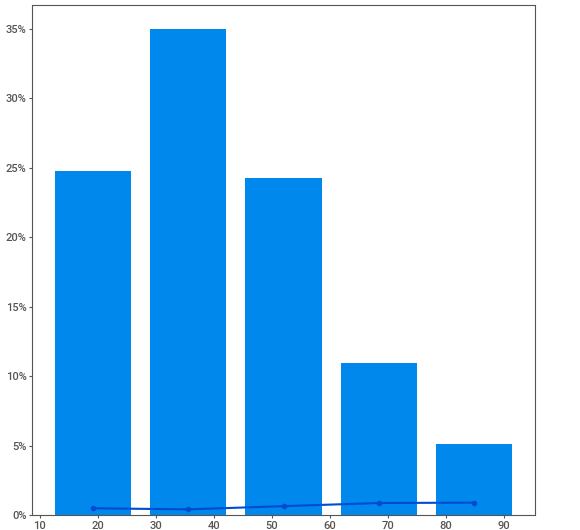
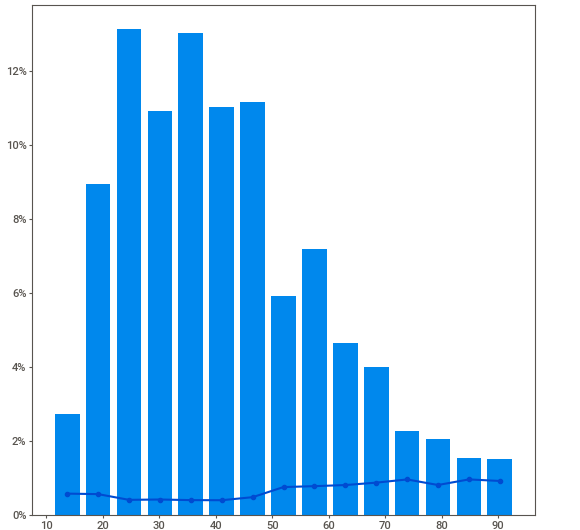
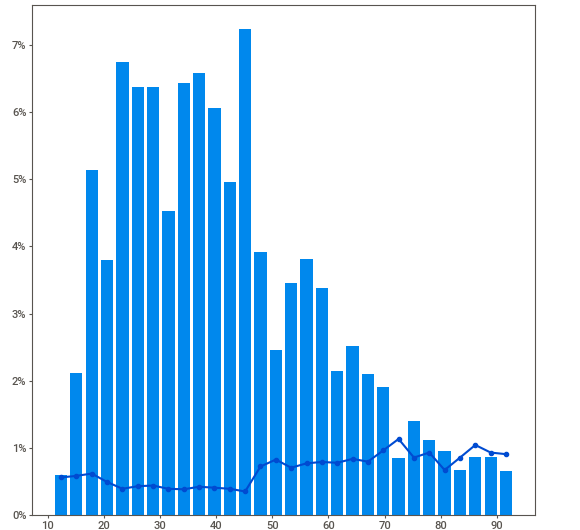
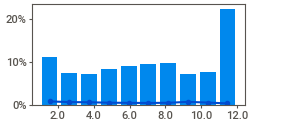
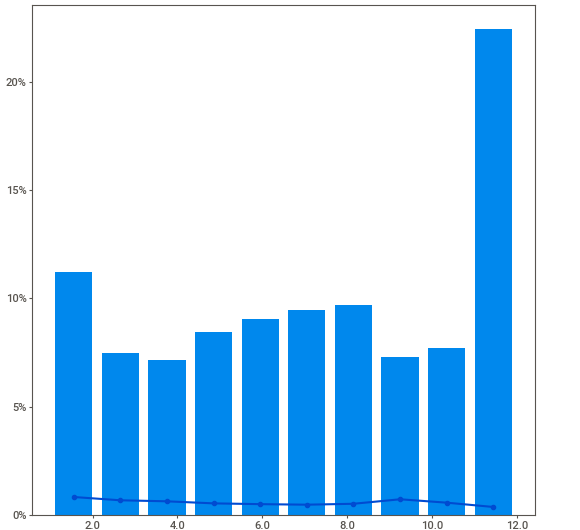
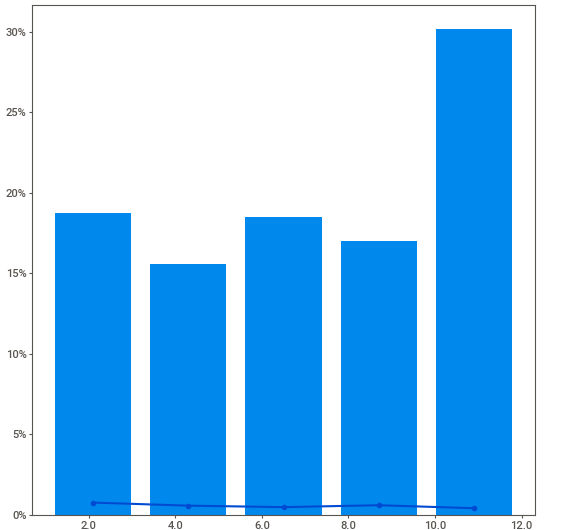
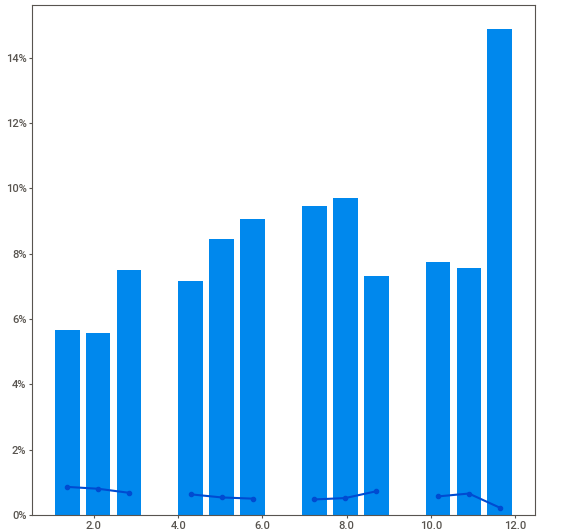
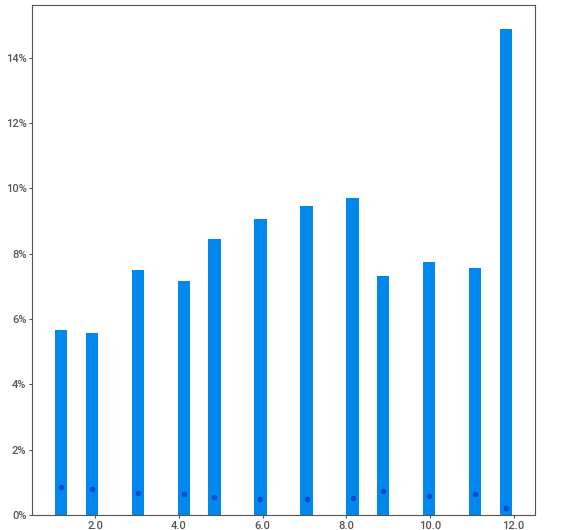
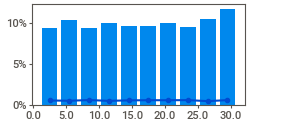
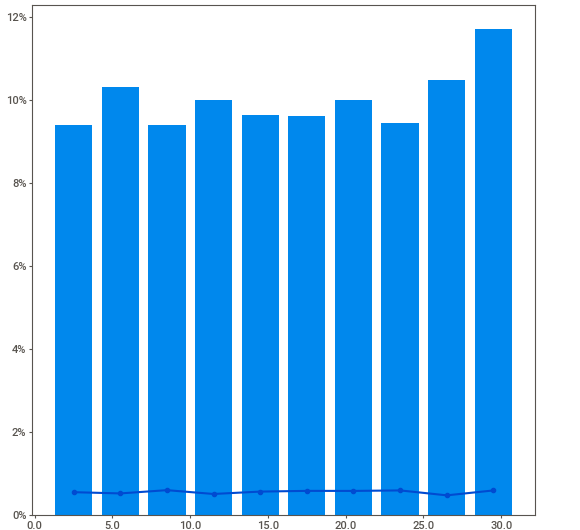
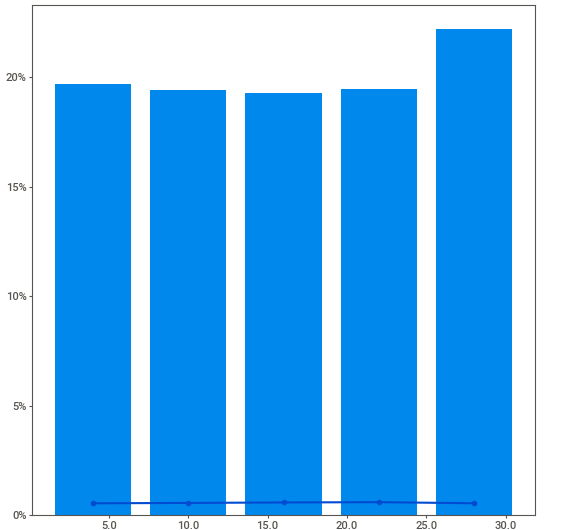
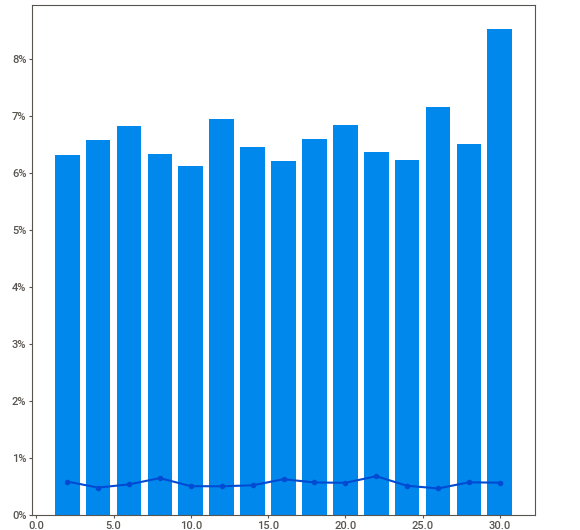
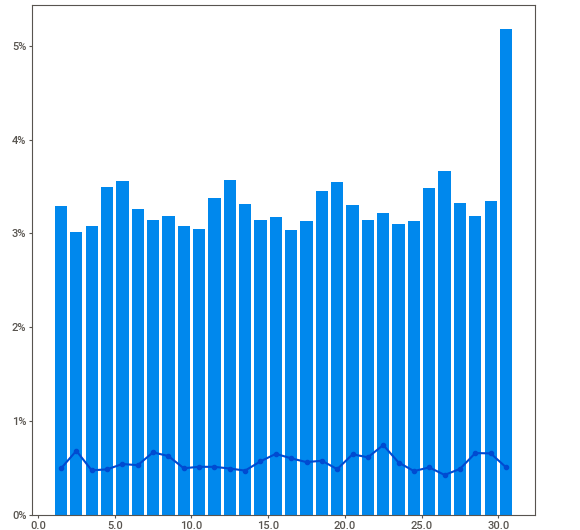
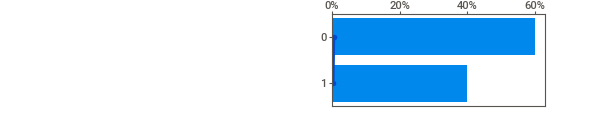
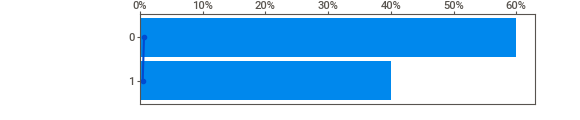
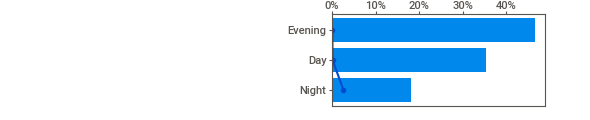
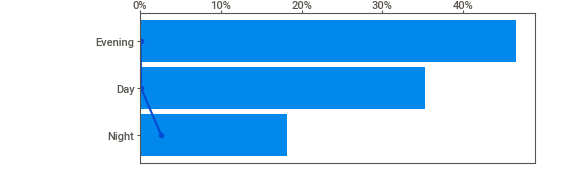
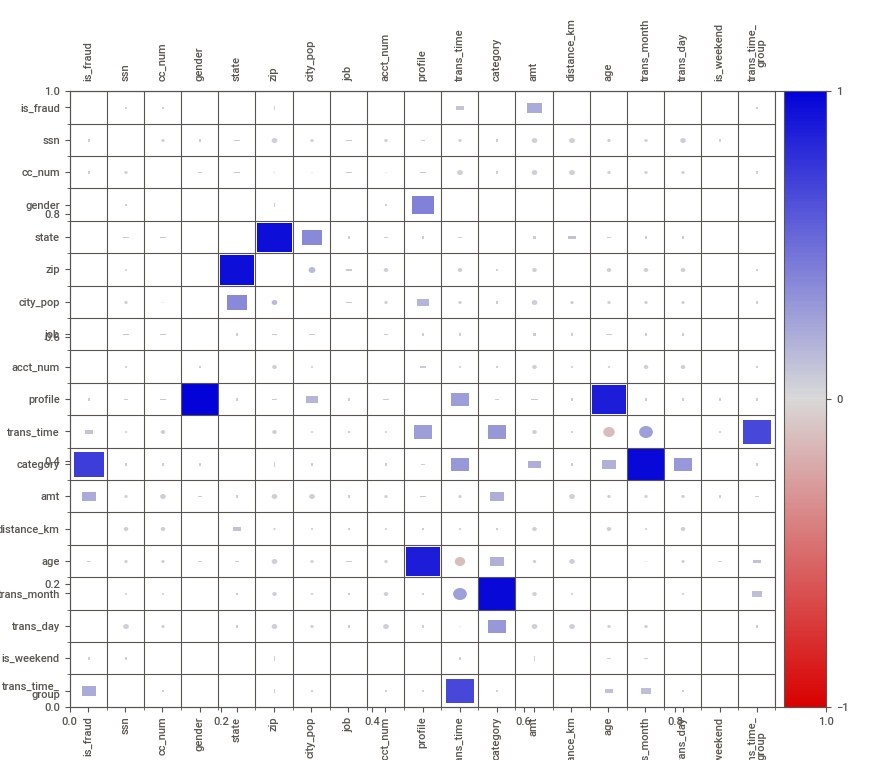
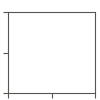

In [21]:
report.show_notebook(w="100%", h="500")

# EDA - Explenatory Data Analysis

#### <font color='Indigo'> Descriptive Statistics

In [25]:
df.describe()

ssn         cc_num        gender           zip         city_pop    \
count  3.000000e+05  3.000000e+05  300000.000000  300000.000000  3.000000e+05   
mean   4.506491e+08  3.670804e+17       0.517723   51070.220327  2.971528e+05   
std    2.601384e+08  1.229931e+18       0.499687   29651.824670  5.719462e+05   
min    1.076840e+06  6.040003e+10       0.000000    1002.000000  4.400000e+01   
25%    2.251791e+08  3.853209e+13       0.000000   27603.000000  1.770000e+04   
50%    4.485947e+08  3.506336e+15       1.000000   48081.000000  6.089200e+04   
75%    6.767600e+08  4.579304e+15       1.000000   78239.000000  2.368230e+05   
max    8.999105e+08  4.999689e+18       1.000000   99929.000000  2.906700e+06   

         acct_num     trans_time         amt         is_fraud     \
count  3.000000e+05  300000.000000  300000.000000  300000.000000   
mean   4.971182e+11      16.767853      66.560503       0.005557   
std    2.894862e+11       4.527871     199.455600       0.074336   
min    1.837412e+07       0.000000       1.000000       0.000000   
25%    2.451203e+11      14.000000       8.260000       0.000000   
50%    4.957189e+11      17.000000      33.330000       0.000000   
75%    7.501600e+11      20.000000      76.830000       0.000000   
max    9.999583e+11      23.000000   22471.870000       1.000000   

        distance_km        age        trans_month     trans_day    \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean       76.436283      41.721203       7.128747      15.870397   
std        29.238398      17.849832       3.420063       8.842372   
min         0.000000      11.000000       1.000000       1.000000   
25%        56.000000      28.000000       4.000000       8.000000   
50%        79.000000      39.000000       7.000000      16.000000   
75%        99.000000      53.000000      10.000000      24.000000   
max       149.000000      93.000000      12.000000      31.000000   

        is_weekend    
count  300000.000000  
mean        0.400180  
std         0.489935  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

#### <font color='Indigo'> Target Value

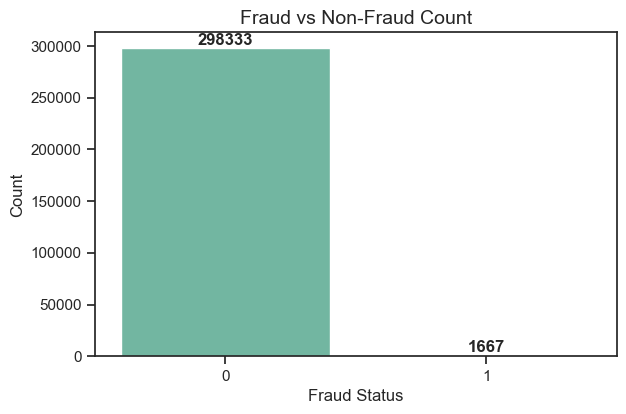

In [28]:
# Create the countplot
plt.figure(figsize=(6,4))
ax = sns.countplot(x='is_fraud', data=df, palette='Set2')

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Show the plot
plt.title("Fraud vs Non-Fraud Count", fontsize=14)
plt.xlabel("Fraud Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [30]:
avg_regular_day_fraud = df[df['is_weekend'] == 0]['is_fraud'].mean()
avg_weekend_day_fraud = df[df['is_weekend'] == 1]['is_fraud'].mean()

print(f"Average Credit Card Frauds on Regular Days: {avg_regular_day_fraud}")
print(f"Average Credit Card Frauds on Weekend Days: {avg_weekend_day_fraud}")
print(df['is_fraud'].mean())

Average Credit Card Frauds on Regular Days: 0.006363020017116246
Average Credit Card Frauds on Weekend Days: 0.004348043380478784
0.005556666666666666


##### <font color='blue'> plot card fraud distribution by state group

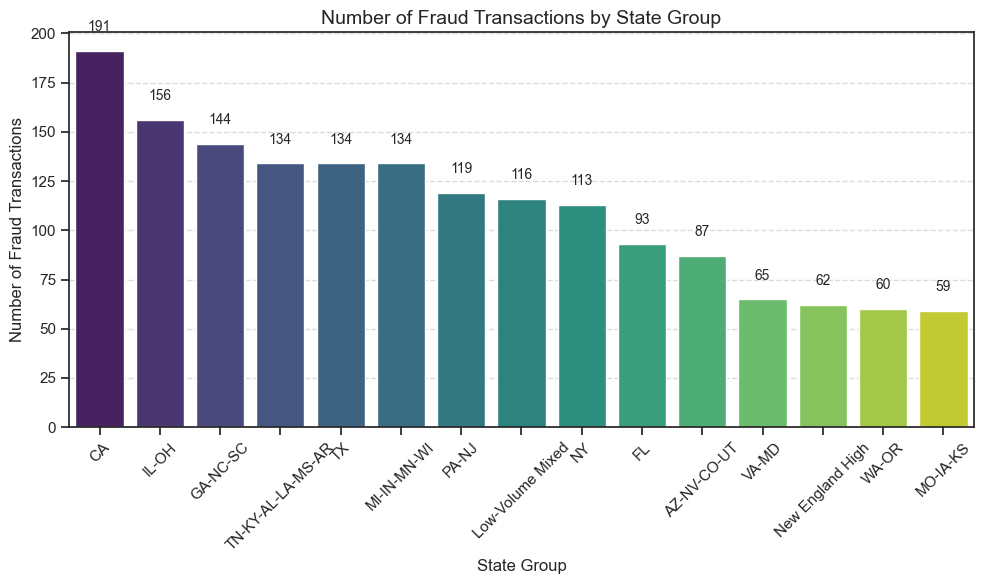

In [33]:
# Filter the DataFrame for fraud transactions (is_fraud = 1)
fraud_df = df[df['is_fraud'] == 1]

# Group by 'state_group' and count the number of fraud transactions
fraud_counts_by_state_group = fraud_df['state'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_counts_by_state_group.index, y=fraud_counts_by_state_group.values, palette='viridis')

# Add labels and title
plt.xlabel('State Group', fontsize=12)
plt.ylabel('Number of Fraud Transactions', fontsize=12)
plt.title('Number of Fraud Transactions by State Group', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show values on bars
for index, value in enumerate(fraud_counts_by_state_group.values):
    plt.text(index, value + 10, f"{value:,}", ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

##### <font color='blue'> plot card fraud distribution by jobs group

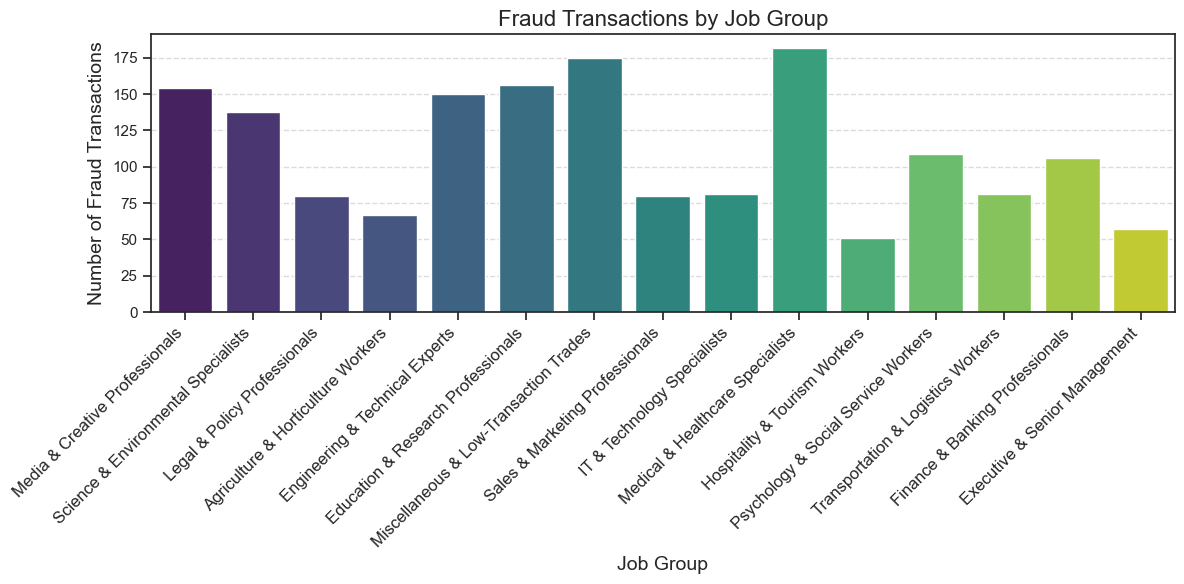

In [36]:
# Filter the DataFrame for fraud transactions (is_fraud == 1)
fraud_df = df[df['is_fraud'] == 1]

# Plot the count of fraud transactions by 'job_group'
plt.figure(figsize=(12, 6))  # Increased figure width for readability
sns.countplot(x='job', data=fraud_df, palette='viridis')

# Add labels and title
plt.xlabel('Job Group', fontsize=14)
plt.ylabel('Number of Fraud Transactions', fontsize=14)
plt.title('Fraud Transactions by Job Group', fontsize=16)

# Improve x-axis labels readability
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align to the right
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.show()

##### <font color='blue'> plot card fraud distribution by profile

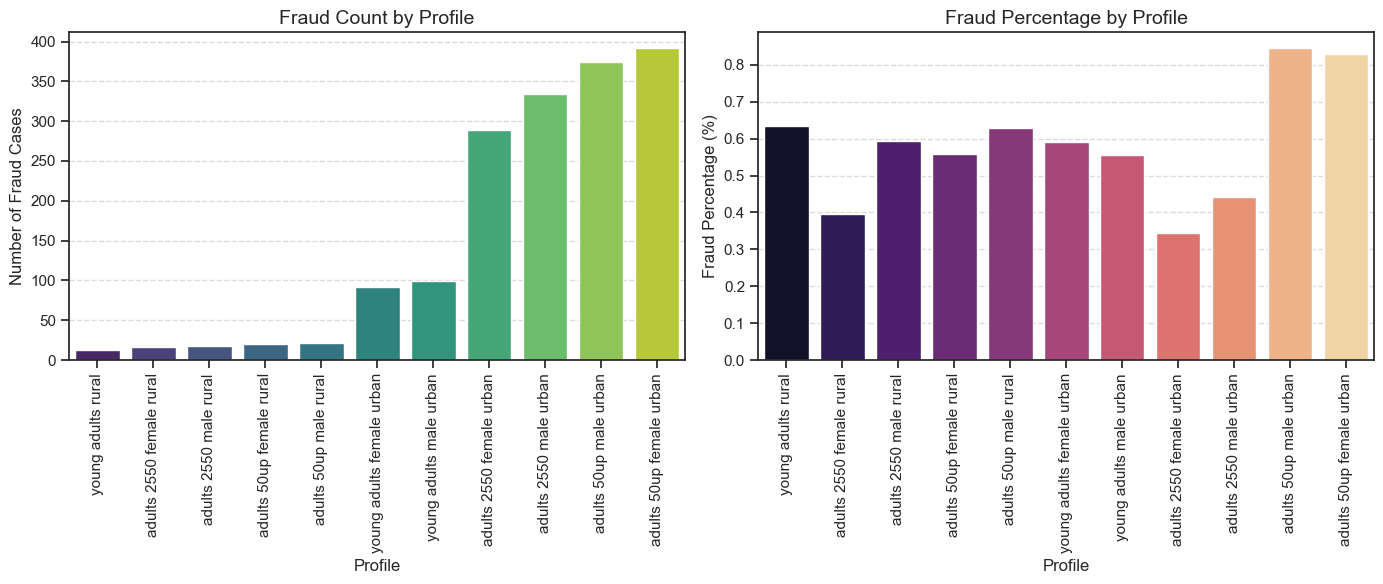

In [39]:
# Group by profile and sum the frauds (1 means fraud)
fraud_by_profile = df.groupby('profile')['is_fraud'].sum()

# Calculate the total number of transactions per profile
total_transactions_by_profile = df.groupby('profile').size()

# Calculate the percentage of fraud transactions for each profile
fraud_percentage_by_profile = (fraud_by_profile / total_transactions_by_profile) * 100

# Sort by the number of fraud cases in ascending order
fraud_by_profile = fraud_by_profile.sort_values(ascending=True)
fraud_percentage_by_profile = fraud_percentage_by_profile[fraud_by_profile.index]

# Set up the subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Fraud count by profile
sns.barplot(x=fraud_by_profile.index, y=fraud_by_profile.values, palette='viridis', ax=axes[0])
axes[0].set_xlabel('Profile', fontsize=12)
axes[0].set_ylabel('Number of Fraud Cases', fontsize=12)
axes[0].set_title('Fraud Count by Profile', fontsize=14)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Fraud percentage by profile
sns.barplot(x=fraud_percentage_by_profile.index, y=fraud_percentage_by_profile.values, palette='magma', ax=axes[1])
axes[1].set_xlabel('Profile', fontsize=12)
axes[1].set_ylabel('Fraud Percentage (%)', fontsize=12)
axes[1].set_title('Fraud Percentage by Profile', fontsize=14)
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


##### <font color='blue'> plot card fraud distribution by category

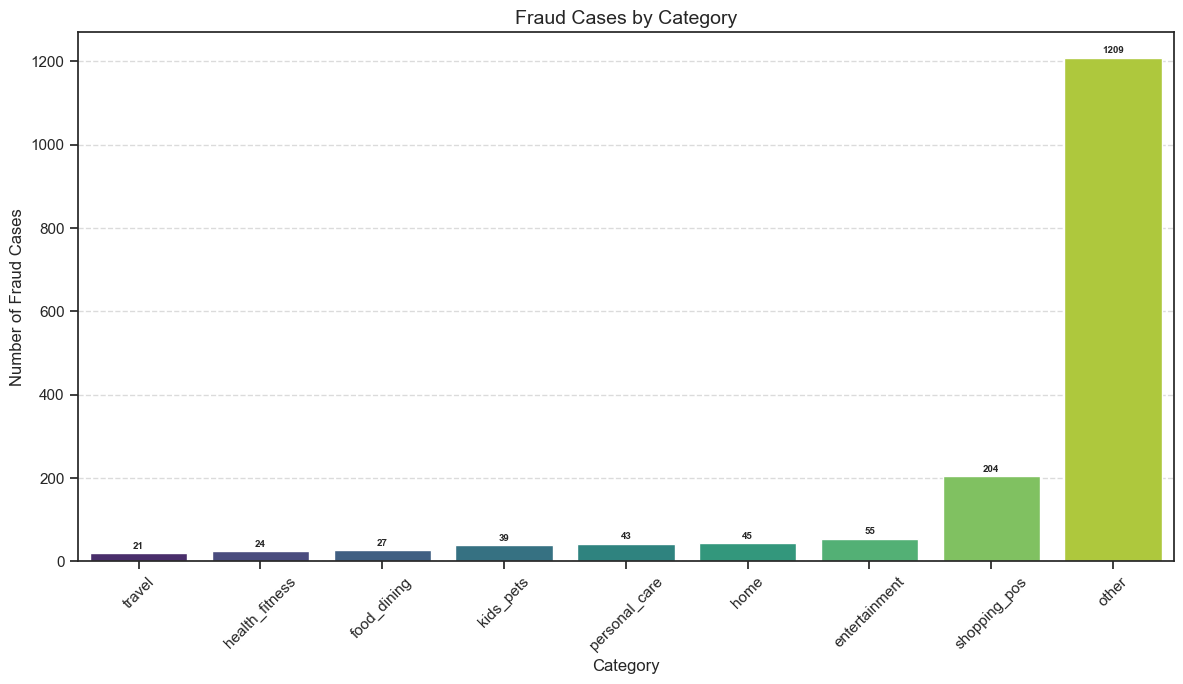

In [42]:
# Group fraud counts by category
fraud_by_category = df.groupby('category')['is_fraud'].sum().reset_index()

# Sort categories by fraud count
fraud_by_category = fraud_by_category.sort_values(by='is_fraud', ascending=True)

# Plot fraud cases by category
plt.figure(figsize=(12, 7))
sns.barplot(x='category', y='is_fraud', data=fraud_by_category, palette='viridis')

# Add fraud count values above each bar
for index, row in enumerate(fraud_by_category.itertuples()):
    plt.text(index, row.is_fraud + 10, f"{row.is_fraud}", ha='center', fontsize=7, fontweight='bold')

# Add labels and title
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.title('Fraud Cases by Category', fontsize=14)
plt.xticks(rotation=45)  # Rotates x labels slightly for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

##### <font color='blue'> plot card fraud distribution by trans_time_group

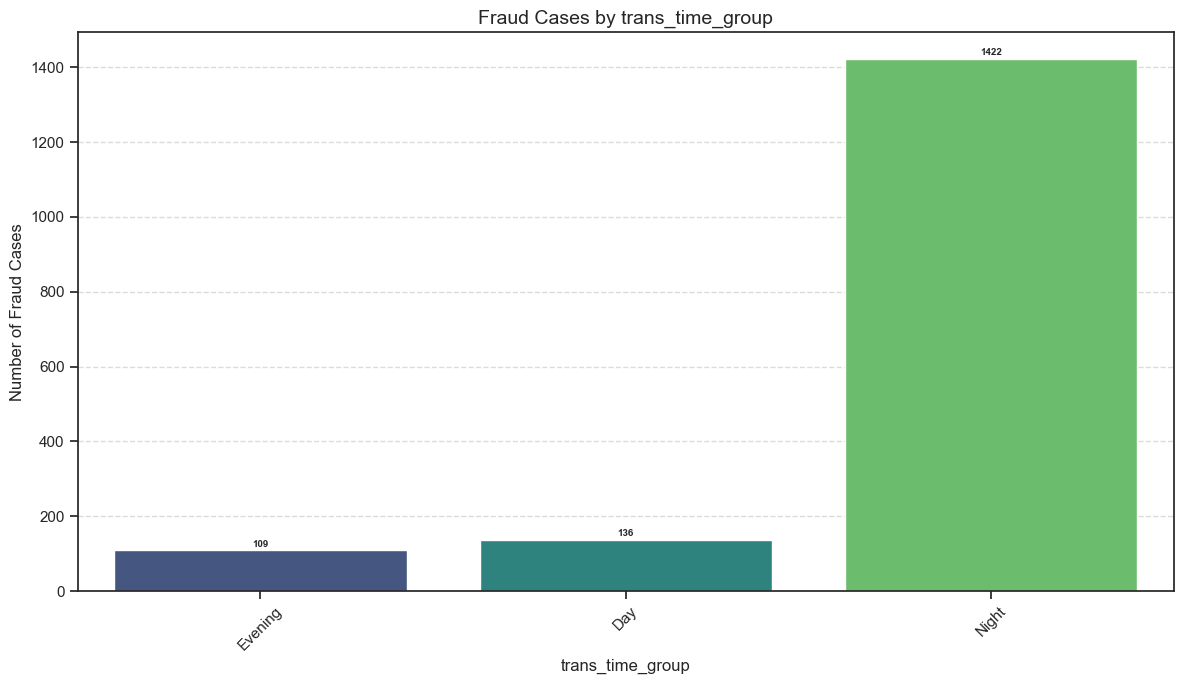

In [45]:
# Group fraud counts by category
fraud_by_category = df.groupby('trans_time_group')['is_fraud'].sum().reset_index()

# Sort categories by fraud count
fraud_by_category = fraud_by_category.sort_values(by='is_fraud', ascending=True)

# Plot fraud cases by category
plt.figure(figsize=(12, 7))
sns.barplot(x='trans_time_group', y='is_fraud', data=fraud_by_category, palette='viridis')

# Add fraud count values above each bar
for index, row in enumerate(fraud_by_category.itertuples()):
    plt.text(index, row.is_fraud + 10, f"{row.is_fraud}", ha='center', fontsize=7, fontweight='bold')

# Add labels and title
plt.xlabel('trans_time_group', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.title('Fraud Cases by trans_time_group', fontsize=14)
plt.xticks(rotation=45)  # Rotates x labels slightly for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## <font color='blue'>Summary of Key Findings

- **Dataset Imbalance**: The dataset has a fraud rate of 0.56%, with a severe imbalance (99.44% non-fraud vs. 0.56% fraud), necessitating specialized modeling techniques.
- **Regions**: Fraud rates are consistent across regions (0.46% to 0.64%), suggesting geography is not a major fraud predictor.
- **Job Categories**: Fraud rates range from 0.46% to 0.68%, with Education & Research Professionals showing the highest rate.
- **Customer Profiles**: Urban adults aged 50+ have higher fraud rates (~0.84%), while urban females aged 25-50 have the lowest (0.34%), indicating demographic influences.
- **Transaction Categories**: The "other" category has a 100% fraud rate, and "shopping_pos" has 2.33%, far exceeding other categories (0.06% to 0.15%), marking this as a key feature.
- **Transaction Time**: Nighttime transactions have a 2.61% fraud rate, significantly higher than day (0.13%) or evening (0.08%), underscoring time as a critical factor.

<font color='brown'>**These findings emphasize the importance of transaction category, time, and customer demographics in predicting credit card fraud. Future modeling efforts should prioritize these features to enhance detection accuracy.**

#### <font color='Indigo'> Dummy Data 

In [49]:
cols_dummy= ['is_fraud', 'gender', 'is_weekend']
dum_df = df[cols_dummy]

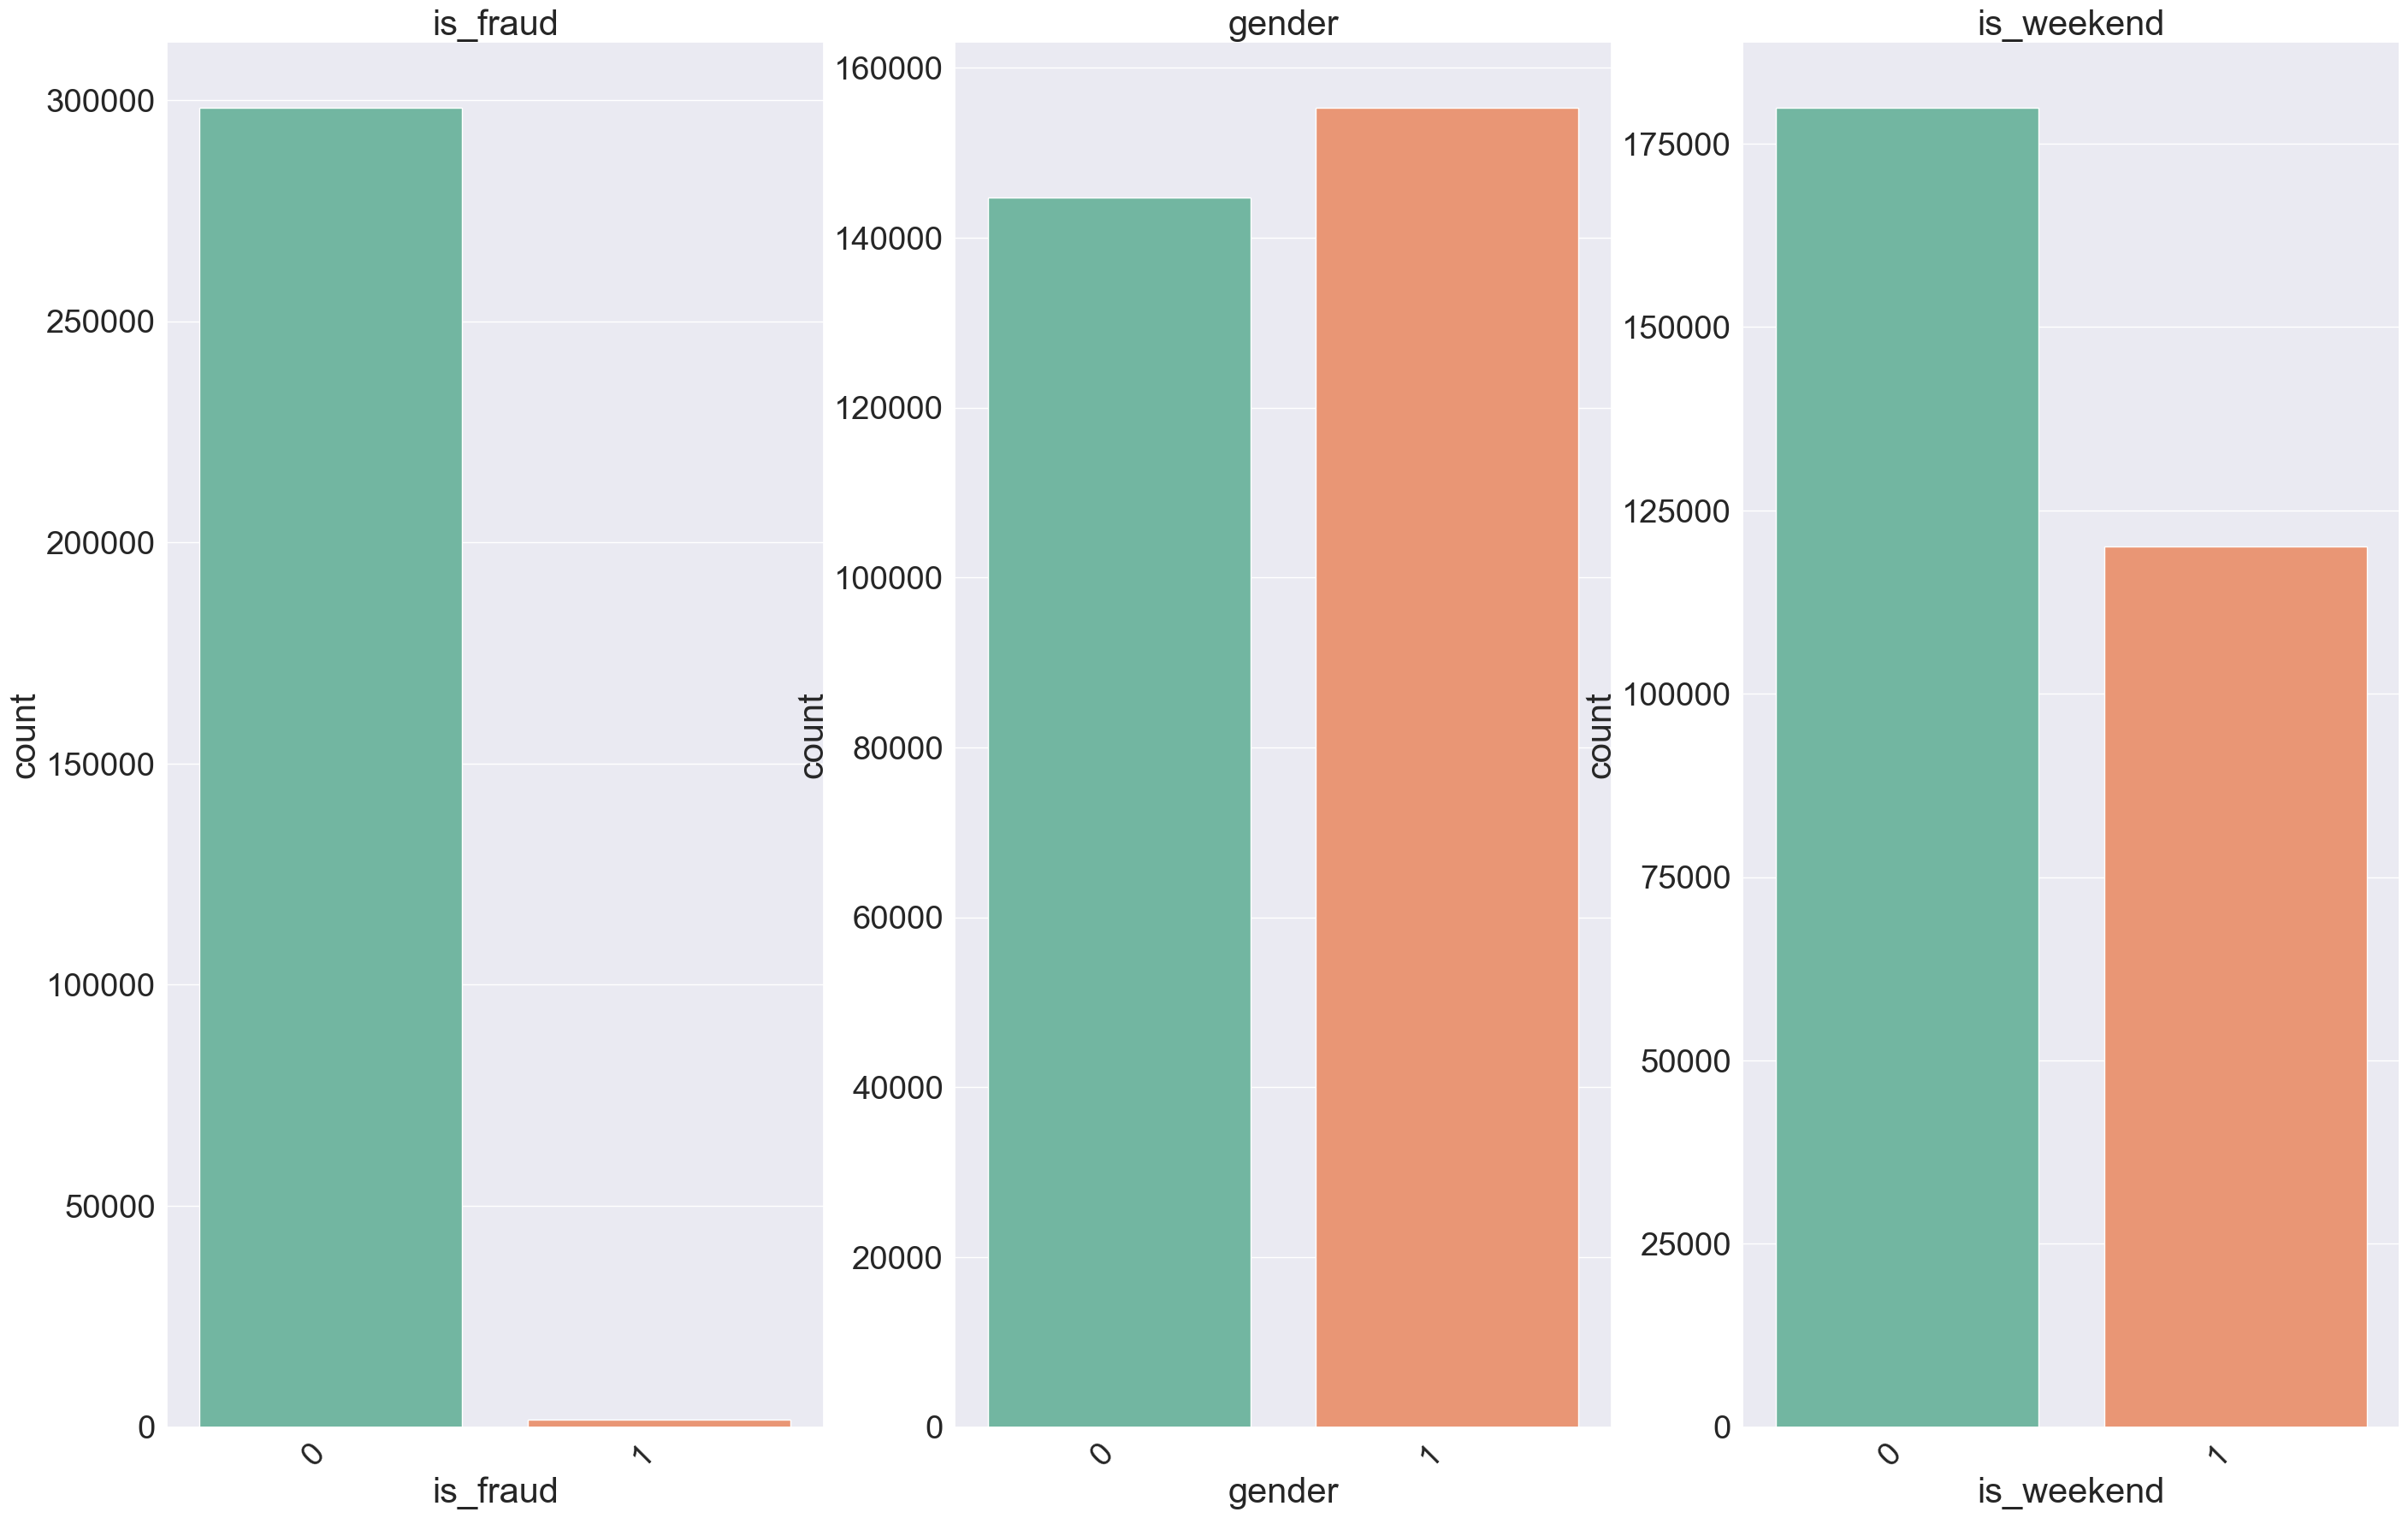

In [51]:
a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace=1.5)
sns.set(font_scale=2.5)

# Loop through each categorical column in your DataFrame
for i in dum_df.columns:
    plt.subplot(a, b, c)  # Set subplot position
    plt.title(f'{i}')
    plt.xlabel(i)
    
    # Add color palette to the countplot
    sns.countplot(data=dum_df, x=i, palette='Set2')  # Change 'Set2' to any palette you like
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")  # 45 degrees, adjust 'ha' (horizontal alignment) to 'right'

    c = c + 1  # Increment the counter for the next subplot

# Show the plot
plt.show()

#### <font color='Indigo'> Categorial Data 

In [53]:
categorical =['state', 'job', 'profile', 'category', 'trans_time', 'trans_time_group', 'trans_month', 'trans_day']
# Filter out the categorical columns'
categorical_df = df[categorical]

In [56]:
plot_categorical = lambda col: sns.countplot(x=col, data=categorical_df)

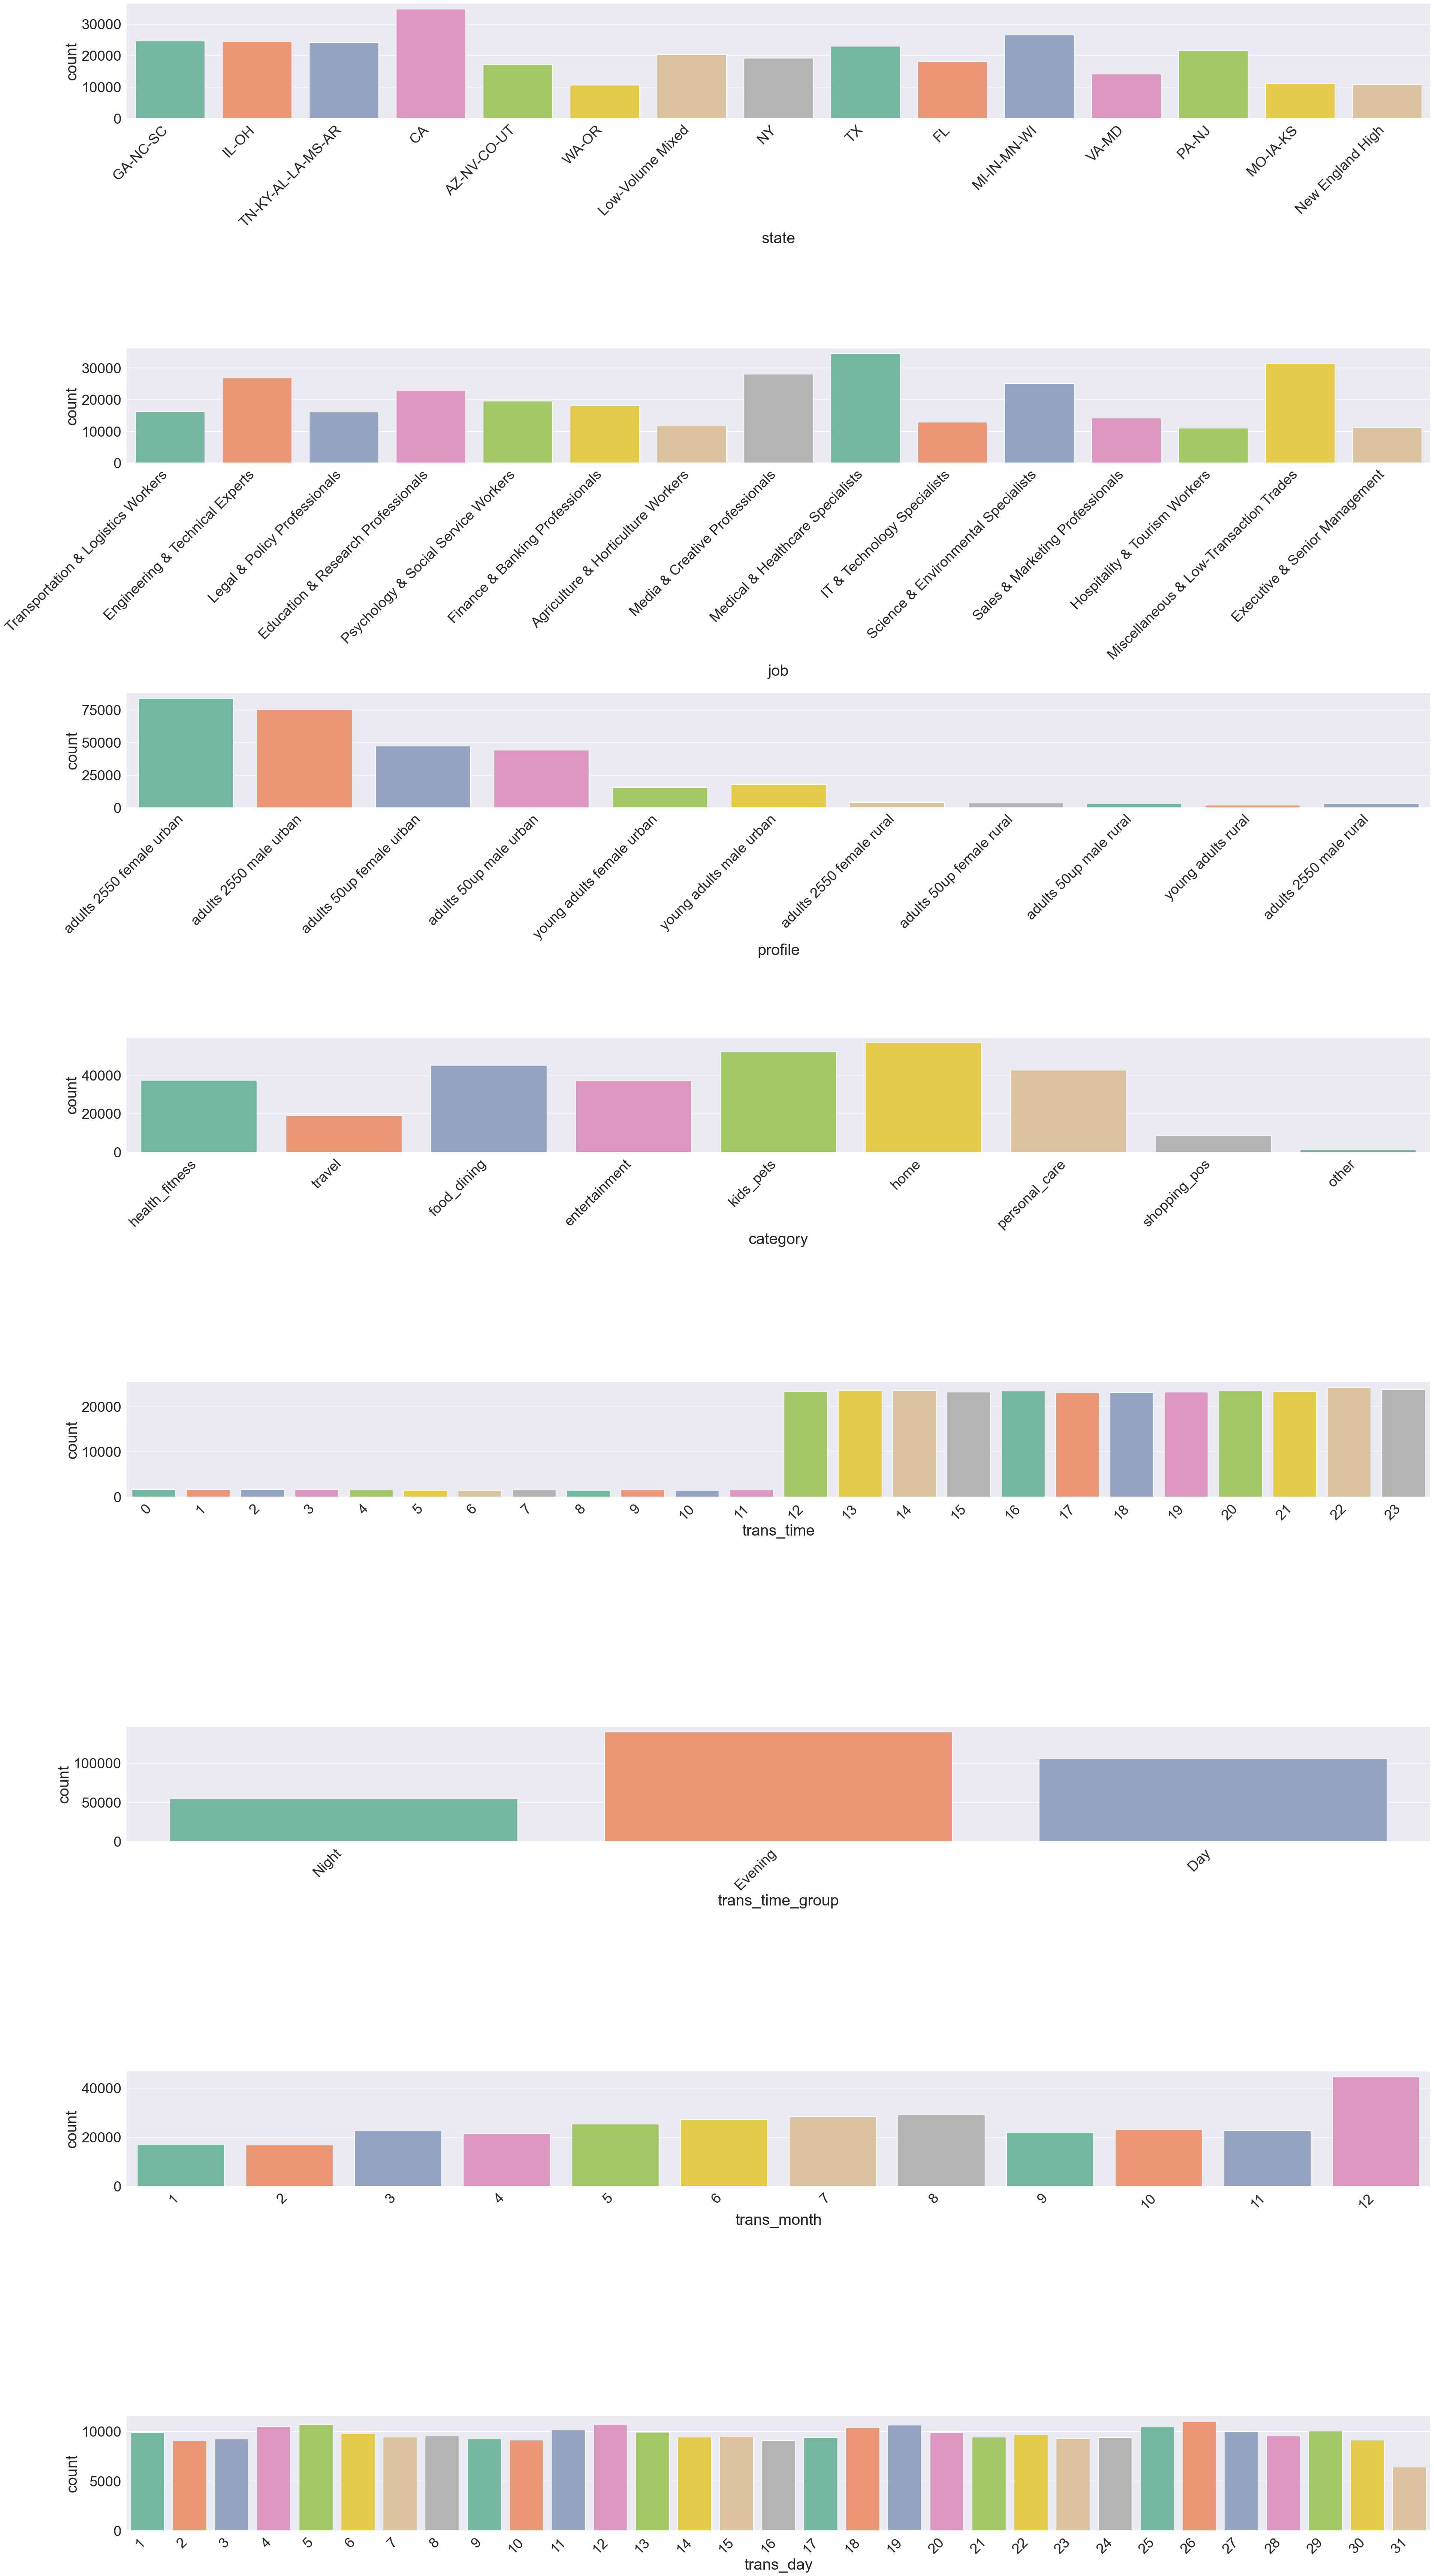

In [58]:
a = 13  # number of rows
b = 1  # number of columns
c = 1  # plot counter

# Create figure with specified size
fig = plt.figure(figsize=(40, 140))
plt.subplots_adjust(hspace=2)
sns.set(font_scale=2.5)

# Loop through each categorical column in your DataFrame
for i in categorical_df.columns:
    plt.subplot(a, b, c)  # Set subplot position
   # plt.title(f'{i}')
    #plt.xlabel(i)
    
    # Add color palette to the countplot
    sns.countplot(data=categorical_df, x=i, palette='Set2')  # Change 'Set2' to any palette you like
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")  # 45 degrees, adjust 'ha' (horizontal alignment) to 'right'

    c = c + 1  # Increment the counter for the next subplot

# Show the plot
plt.show()

#### <font color='Indigo'> Histograms for continues numbers 

In [60]:
numerical = ['ssn', 'cc_num', 'zip', 'city_pop', 'acct_num',  'amt', 'distance_km', 'age']
df_num = df[numerical]
df_num.shape

(300000, 8)

In [61]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ssn          300000 non-null  int32  
 1   cc_num       300000 non-null  int64  
 2   zip          300000 non-null  int64  
 3   city_pop     300000 non-null  int64  
 4   acct_num     300000 non-null  int64  
 5   amt          300000 non-null  float64
 6   distance_km  300000 non-null  int64  
 7   age          300000 non-null  int32  
dtypes: float64(1), int32(2), int64(5)
memory usage: 16.0 MB


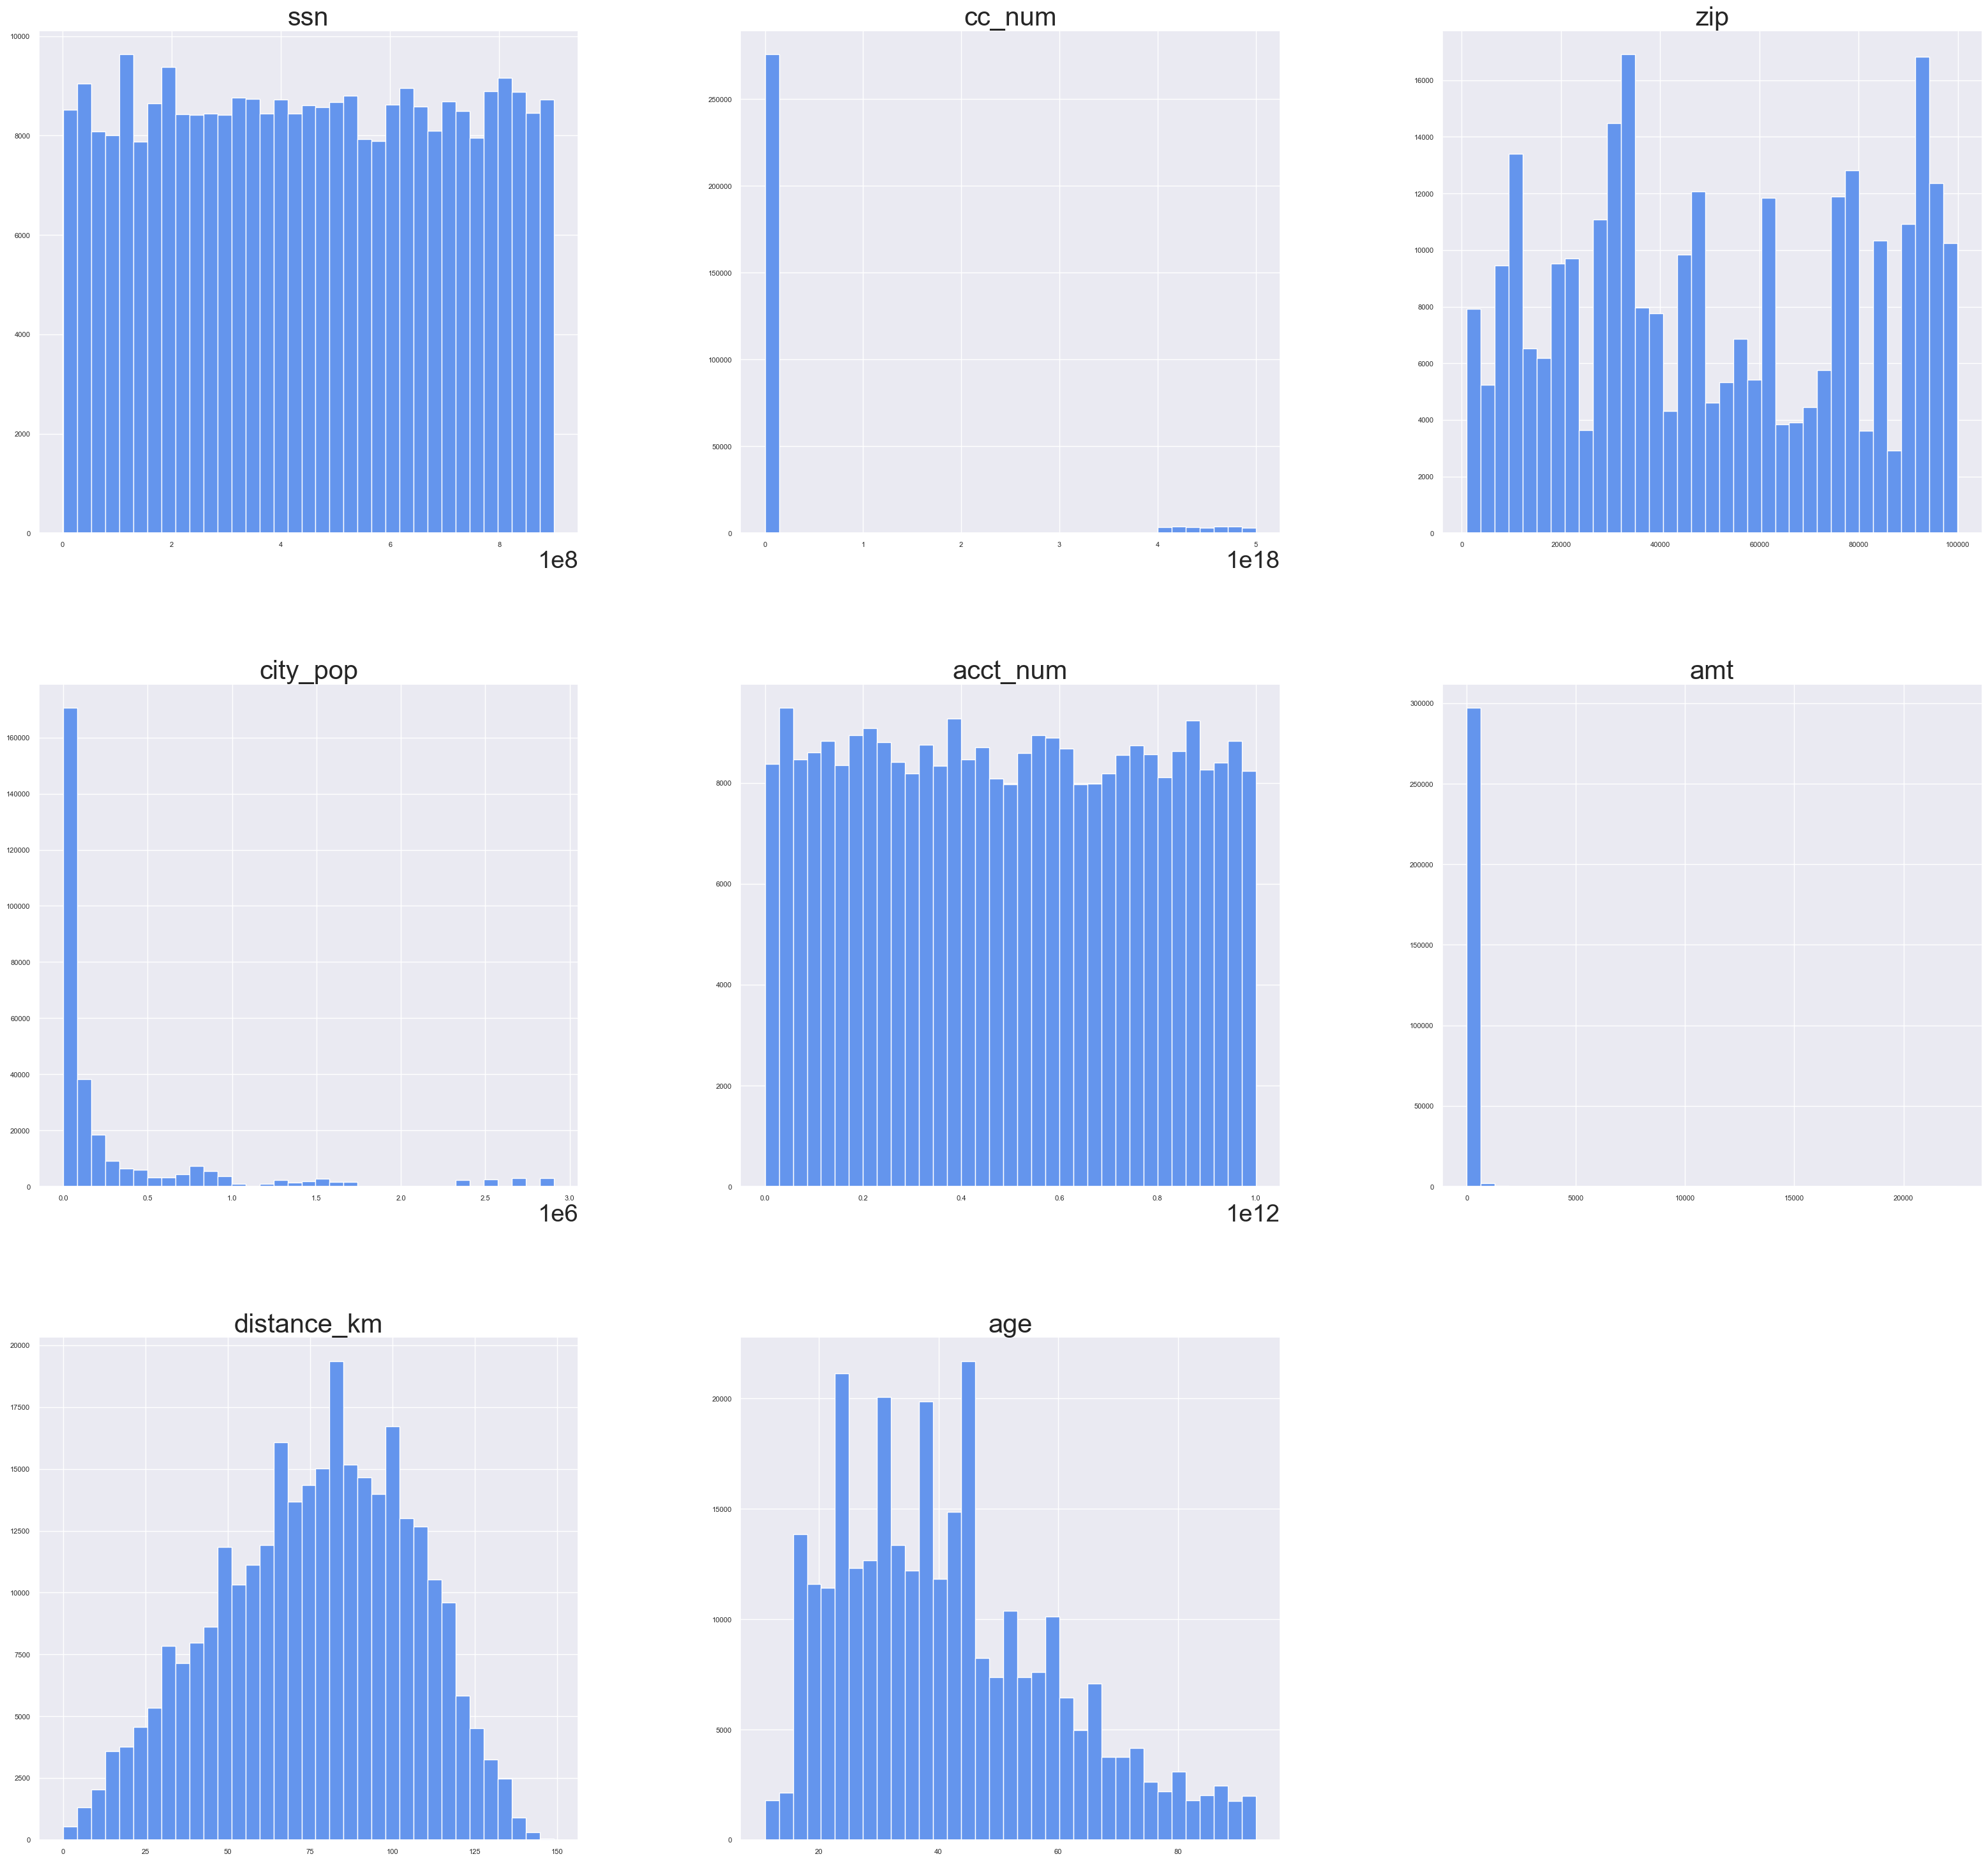

In [65]:
df_num.hist(figsize=(35, 35), bins=35, xlabelsize=8, ylabelsize=8, color = "cornflowerblue");

#### <font color='Indigo'> Skewness

In [67]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default  
pd.DataFrame(df_num.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

#### <font color='Indigo'> Correlation

In [71]:
# Identify object (categorical) columns
categorical_cols =['is_fraud', 'gender', 'state', 'job', 'profile', 'category', 'is_weekend', 'trans_time_group']

# Initialize LabelEncoder
le = LabelEncoder()

df_corr = df.copy()
# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_corr[col] = le.fit_transform(df_corr[col])

# remove string columns
df_corr = df_corr.drop(columns=['trans_num'])

In [73]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ssn               300000 non-null  int32  
 1   cc_num            300000 non-null  int64  
 2   gender            300000 non-null  int64  
 3   state             300000 non-null  int32  
 4   zip               300000 non-null  int64  
 5   city_pop          300000 non-null  int64  
 6   job               300000 non-null  int32  
 7   acct_num          300000 non-null  int64  
 8   profile           300000 non-null  int32  
 9   trans_time        300000 non-null  int32  
 10  category          300000 non-null  int32  
 11  amt               300000 non-null  float64
 12  is_fraud          300000 non-null  int64  
 13  distance_km       300000 non-null  int64  
 14  age               300000 non-null  int32  
 15  trans_month       300000 non-null  int32  
 16  trans_day         30

In [75]:
df_corr.corr(method='spearman')

ssn     cc_num    gender     state      zip    city_pop  \
ssn               1.000000 -0.009940  0.008025 -0.009874  0.002868 -0.000814   
cc_num           -0.009940  1.000000 -0.009794  0.009076 -0.003704  0.016709   
gender            0.008025 -0.009794  1.000000  0.012525  0.000689 -0.001395   
state            -0.009874  0.009076  0.012525  1.000000 -0.280321 -0.135373   
zip               0.002868 -0.003704  0.000689 -0.280321  1.000000  0.170974   
city_pop         -0.000814  0.016709 -0.001395 -0.135373  0.170974  1.000000   
job              -0.008656  0.008159 -0.004819  0.002842 -0.000550  0.009493   
acct_num          0.007025  0.012080 -0.005174  0.001356 -0.000203  0.005966   
profile          -0.007256  0.022215 -0.406616 -0.009317  0.002122  0.020691   
trans_time       -0.002042  0.001953  0.001304 -0.001896  0.001629 -0.011804   
category         -0.003557 -0.000368  0.019387 -0.004864  0.000129  0.000206   
amt               0.000055 -0.005941  0.091992 -0.000488 -0.000598 -0.006256   
is_fraud         -0.002149  0.003571 -0.004132 -0.000028 -0.001315  0.000568   
distance_km       0.000795 -0.000519  0.001618 -0.015777  0.010727  0.013819   
age               0.003054 -0.000574  0.015493 -0.010102  0.002996 -0.010599   
trans_month      -0.004463 -0.000461 -0.000141 -0.004438 -0.000624  0.000967   
trans_day         0.000718  0.006248 -0.001495 -0.000703  0.000962 -0.001026   
is_weekend        0.002695  0.000198  0.010733 -0.001946  0.000646  0.002688   
trans_time_group -0.001222  0.000474  0.000724 -0.003162  0.002304 -0.002433   

                     job    acct_num   profile  trans_time  category  \
ssn              -0.008656  0.007025 -0.007256  -0.002042  -0.003557   
cc_num            0.008159  0.012080  0.022215   0.001953  -0.000368   
gender           -0.004819 -0.005174 -0.406616   0.001304   0.019387   
state             0.002842  0.001356 -0.009317  -0.001896  -0.004864   
zip              -0.000550 -0.000203  0.002122   0.001629   0.000129   
city_pop          0.009493  0.005966  0.020691  -0.011804   0.000206   
job               1.000000 -0.002034 -0.005771   0.001567   0.001744   
acct_num         -0.002034  1.000000  0.007707   0.004284  -0.001363   
profile          -0.005771  0.007707  1.000000  -0.079555   0.019978   
trans_time        0.001567  0.004284 -0.079555   1.000000   0.128277   
category          0.001744 -0.001363  0.019978   0.128277   1.000000   
amt               0.002542 -0.000365 -0.069227  -0.010579   0.015446   
is_fraud         -0.002577  0.001342  0.021074   0.002259   0.062707   
distance_km      -0.002344  0.002833 -0.000787   0.001102   0.005032   
age               0.002343 -0.003774  0.174210  -0.116978   0.057585   
trans_month       0.001171  0.000188 -0.000548   0.141840   0.822571   
trans_day         0.001685  0.000684  0.003010   0.010318   0.061604   
is_weekend        0.000126  0.001411  0.027953  -0.001994  -0.014923   
trans_time_group  0.001111  0.003121 -0.011820   0.808951   0.028266   

                     amt    is_fraud  distance_km     age    trans_month  \
ssn               0.000055 -0.002149   0.000795    0.003054  -0.004463     
cc_num           -0.005941  0.003571  -0.000519   -0.000574  -0.000461     
gender            0.091992 -0.004132   0.001618    0.015493  -0.000141     
state            -0.000488 -0.000028  -0.015777   -0.010102  -0.004438     
zip              -0.000598 -0.001315   0.010727    0.002996  -0.000624     
city_pop         -0.006256  0.000568   0.013819   -0.010599   0.000967     
job               0.002542 -0.002577  -0.002344    0.002343   0.001171     
acct_num         -0.000365  0.001342   0.002833   -0.003774   0.000188     
profile          -0.069227  0.021074  -0.000787    0.174210  -0.000548     
trans_time       -0.010579  0.002259   0.001102   -0.116978   0.141840     
category          0.015446  0.062707   0.005032    0.057585   0.822571     
amt               1.000000  0.086972  -0.001749    0.115047   0.002

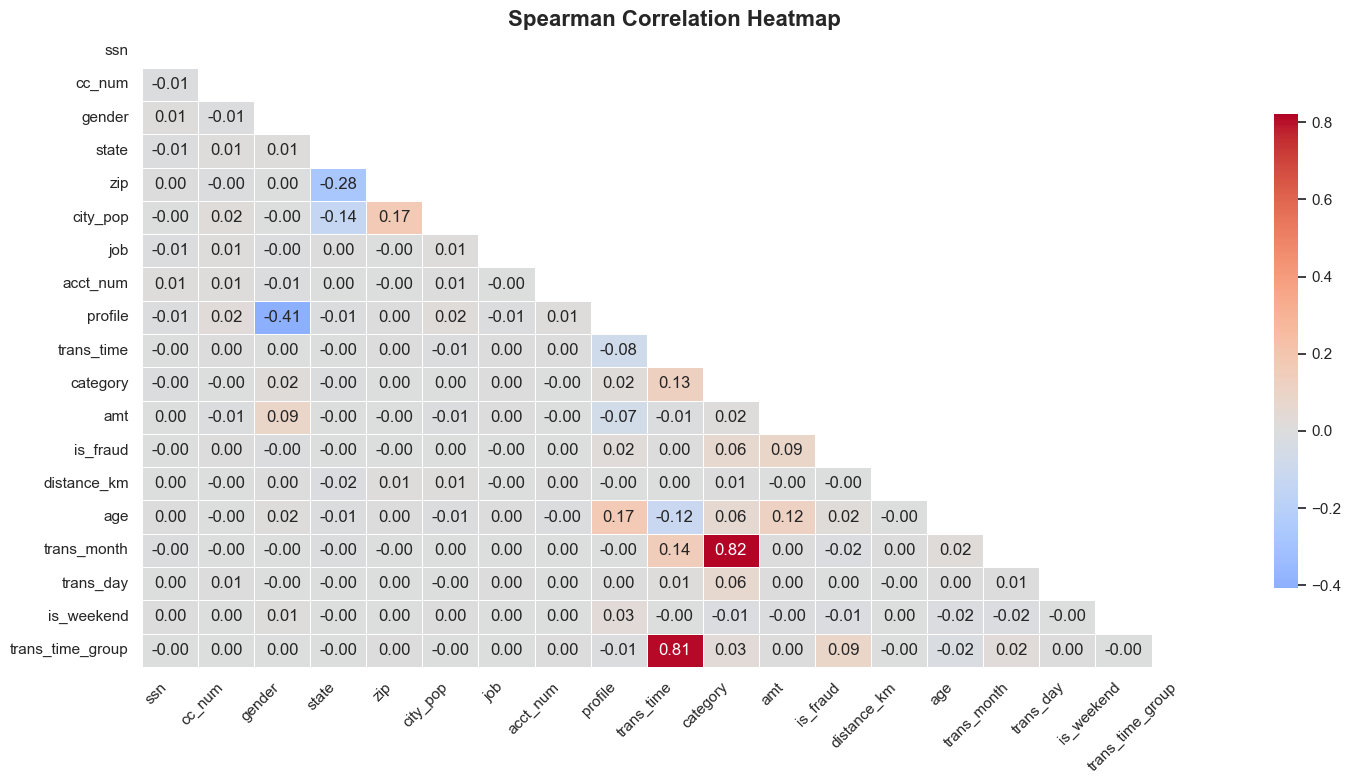

In [76]:
# Compute Spearman correlation
spearman_corr = df_corr.corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

# Create the heatmap
sns.heatmap(
    spearman_corr,
    mask=mask,
    annot=True,           # Show correlation coefficients
    fmt=".2f",            # 2 decimal places
    cmap='coolwarm',      # Choose colormap
    center=0,             # Center the colormap
    linewidths=0.5,       # Lines between boxes
    linecolor='white',    # Line color between boxes
    cbar_kws={"shrink": 0.75}
)

plt.title('Spearman Correlation Heatmap', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 🔍 Report on Spearman Correlation Analysis for Credit Card Fraud Detection

#### Overview
This report summarizes the key findings from a Spearman correlation analysis performed on a credit card fraud detection dataset. The Spearman correlation method assesses the strength and direction of monotonic relationships between variables, making it ideal for identifying non-linear associations. The goal is to understand how various features relate to the target variable `is_fraud` and to each other, providing insights for feature selection and engineering in fraud detection modeling.

#### Key Findings

1. **Correlations with `is_fraud`**  
   The following features show the strongest relationships with `is_fraud`:  
   - **`trans_time_group` (0.092249)**: The strongest positive correlation, suggesting that the timing of transactions (grouped into categories) is a key indicator of fraud.  
   - **`amt` (0.086972)**: Transaction amount has a notable positive correlation, implying higher amounts may be associated with fraudulent activity.  
   - **`category` (0.062707)**: Transaction category shows a moderate positive correlation, indicating certain categories may be more fraud-prone.  
   - **`profile` (0.021074)** and **`age` (0.017570)**: Weak positive correlations suggest demographic factors have a minor influence on fraud.  
   - **`is_weekend` (-0.013280)** and **`trans_month` (-0.016016)**: Weak negative correlations indicate fraud is slightly less likely on weekends or in certain months.  
   - Most other features (e.g., `ssn`, `cc_num`, `distance_km`) exhibit near-zero correlations with `is_fraud`, suggesting limited direct predictive power.
<br><br>
2. **Feature Inter-Correlations**  
   Notable relationships among features include:  
   - **`trans_time` and `trans_time_group` (0.808951)**: A strong positive correlation, likely because `trans_time_group` is derived from `trans_time`. This redundancy suggests one feature may suffice for modeling.  
   - **`category` and `trans_month` (0.822571)**: A very high correlation, reflecting seasonal or monthly patterns in transaction categories (e.g., holiday spending).  
   - **`profile` and `age` (0.174210)**: A moderate positive correlation, indicating customer profiles may be partly defined by age.  
   - **`gender` and `profile` (-0.406616)**: A moderate negative correlation, suggesting gender significantly influences profile segmentation.  
   - **`state` and `zip` (-0.280321)**: A moderate negative correlation, expected due to geographic relationships between states and zip codes.  
   - **`city_pop` and `zip` (0.170974)**: A positive correlation, likely reflecting higher populations in certain zip codes (e.g., urban areas).
<br><br>
3. **Geographical and Demographic Insights**  
   - The correlation between `state` and `zip` highlights geographic dependencies, while `city_pop` and `zip` suggest population density influences.  
   - Demographic features like `profile`, `age`, and `gender` show moderate inter-correlations, indicating potential for demographic-based feature engineering.
<br><br>
4. **Weak Correlations**  
   - Features such as `ssn`, `cc_num`, `acct_num`, `job`, and `distance_km` have correlations close to zero with `is_fraud` and other variables, suggesting they may not directly contribute to fraud detection without further transformation.

#### Implications for Modeling

- **Feature Selection**:  
   Prioritize `trans_time_group`, `amt`, and `category` due to their stronger correlations with `is_fraud`. Features like `ssn` and `cc_num` may be less useful unless combined with others or transformed.

- **Redundancy Consideration**:  
   The high correlation between `trans_time` and `trans_time_group` suggests using only one to avoid multicollinearity.  
   Similarly, `category` and `trans_month` overlap significantly, so one could be selected or combined into a composite feature.

- **Demographic Factors**:  
   The relationships between `profile`, `age`, and `gender` suggest demographic data could enhance models, potentially through interaction terms (e.g., `age_gender`) or stratified approaches.

- **Time-Based Features**:  
   The prominence of `trans_time_group` underscores the value of time-related features. Additional engineering, such as time since last transaction or transaction frequency within time windows, could further improve fraud detection.

#### Conclusion
The Spearman correlation analysis identifies `trans_time_group`, `amt`, and `category` as the most influential features for predicting credit card fraud, despite generally weak correlations with `is_fraud`. Strong inter-correlations, such as between `trans_time` and `trans_time_group` or `category` and `trans_month`, highlight areas for reducing redundancy. Demographic and geographic relationships offer opportunities for enhanced feature engineering. These insights will guide the development of robust fraud detection models by focusing on the most relevant features and relationships in the dataset.
<br><br><br>

 #### <font color='Indigo'>t-test

T-statistic: 41.93788067839858
P-value: 0.0


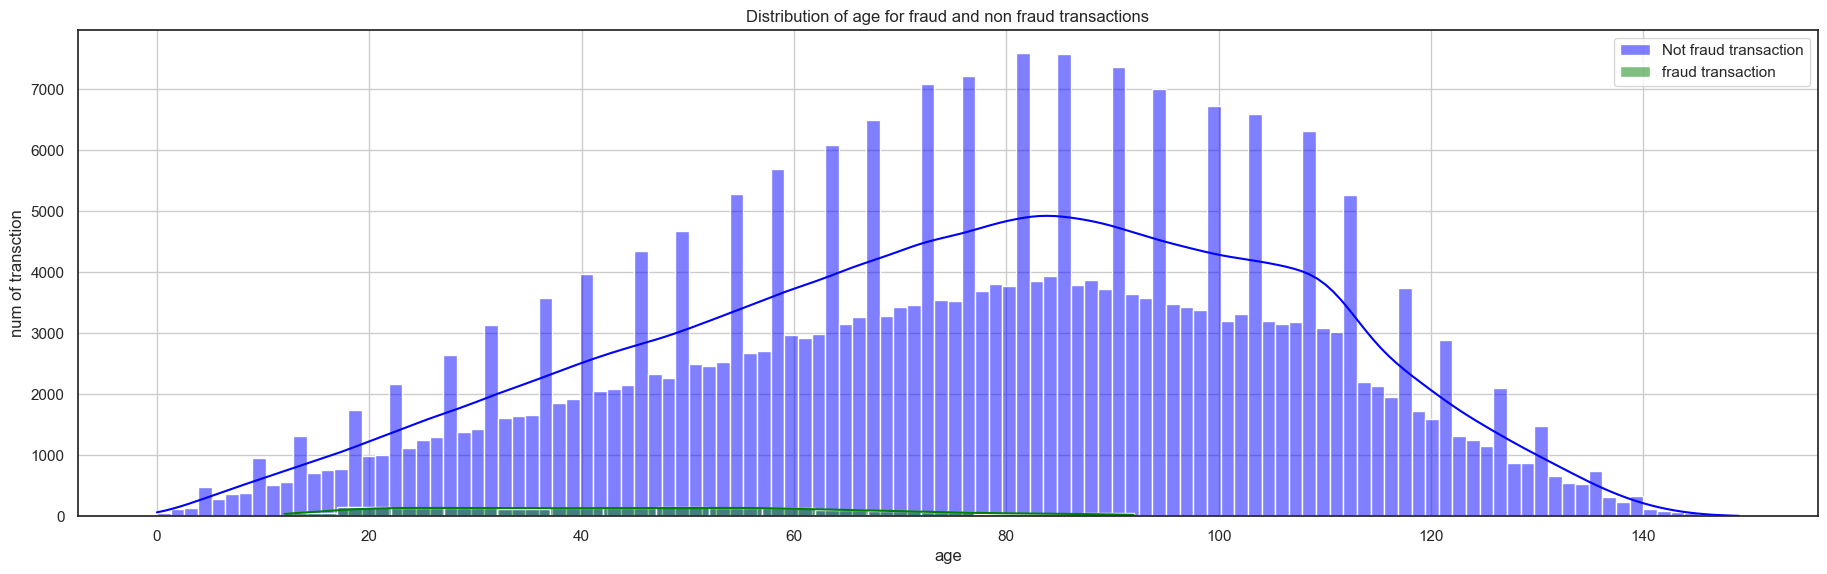

In [86]:
#Separate the transactions data by fraud and not fraudNotfraud_day_trans = df[df['is_fraud'] == 0]['age']
fraud_day_trans = df[df['is_fraud'] == 1]['age']
# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(Notfraud_day_trans, fraud_day_trans)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Plotting the distribution
plt.figure(figsize=(20, 6))
sns.histplot(Notfraud_day_trans, kde=True, color='blue', label='Not fraud transaction', alpha=0.5)
sns.histplot(fraud_day_trans, kde=True, color='green', label='fraud transaction', alpha=0.5)
plt.title('Distribution of age for fraud and non fraud transactions')
plt.xlabel('age')
plt.ylabel('num of transction')
plt.legend()
plt.grid(True)
plt.show()

T-statistic: 0.5773305790770966
P-value: 0.5637165935753032


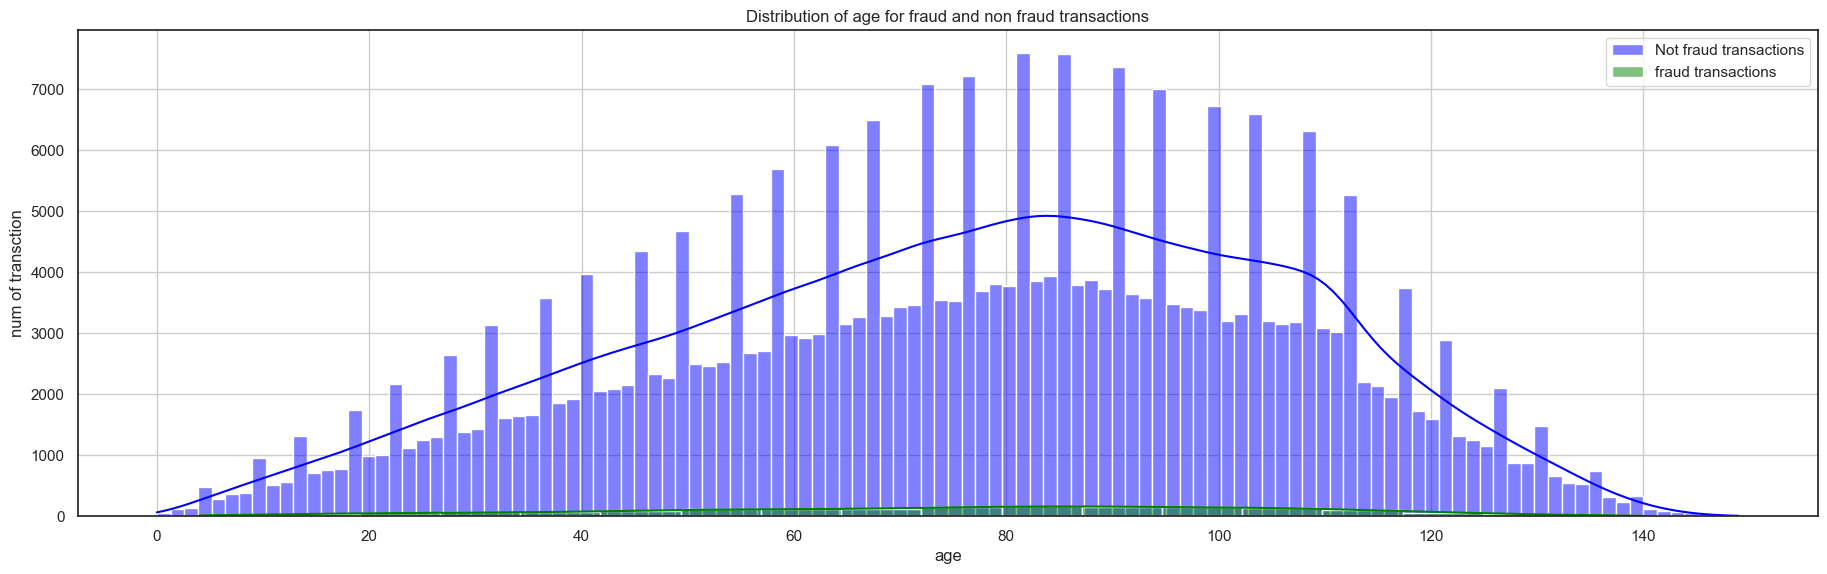

In [88]:
#Separate the transactions data by fraud and not fraud
Notfraud_day_trans = df[df['is_fraud'] == 0]['distance_km']
fraud_day_trans = df[df['is_fraud'] == 1]['distance_km']
# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(Notfraud_day_trans, fraud_day_trans)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Plotting the distribution 
plt.figure(figsize=(20, 6))
sns.histplot(Notfraud_day_trans, kde=True, color='blue', label='Not fraud transactions', alpha=0.5)
sns.histplot(fraud_day_trans, kde=True, color='green', label='fraud transactions', alpha=0.5)
plt.title('Distribution of age for fraud and non fraud transactions')
plt.xlabel('age')
plt.ylabel('num of transction')
plt.legend()
plt.grid(True)
plt.show()

## T-Test Analysis Summary
- **Age**: Highly significant difference (t=41.94, p=0.0); strong predictor for fraud detection.
- **Distance_km**: No significant difference (t=0.58, p=0.564); not useful for fraud detection.
  
#### - <font color='brown'>**Recommendation**: Include `age` in models; exclude `distance_km` to streamline feature set.
<br><br>

 #### <font color='Indigo'>Chis-quare

In [92]:
# Convert all columns of the DataFrame to categorical
categorical_df = categorical_df.apply(lambda x: x.astype('category'))
categorical_df.nunique()

state               15
job                 15
profile             11
category             9
trans_time          24
trans_time_group     3
trans_month         12
trans_day           31
dtype: int64

##### <font color='blue'> Perform Chi-Square test for is_fraud against all categorical columns

In [95]:
results = []
for column in categorical_df.columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df[column], df['is_fraud'])
    
    # Perform Chi-Square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    # Append the results
    results.append({
        'Variable': column,
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof
    })

# Convert results to a DataFrame for better visualization
chi2_results = pd.DataFrame(results)

chi2_results

Variable      Chi2 Statistic     p-value    Degrees of Freedom
0             state        9.113735  8.236964e-01          14        
1               job       12.522058  5.644530e-01          14        
2           profile      219.863159  1.141683e-41          10        
3          category   218019.991055  0.000000e+00           8        
4        trans_time    10996.588701  0.000000e+00          23        
5  trans_time_group     5089.561940  0.000000e+00           2        
6       trans_month      165.469941  1.007814e-29          11        
7         trans_day       33.271766  3.108702e-01          30

### Report on Chi-Square Test Analysis for Credit Card Fraud Detection Modeling

#### Overview
This report presents the results of Chi-Square tests conducted to evaluate the association between the target variable `is_fraud` and various categorical features in a credit card fraud detection dataset. The Chi-Square test is a statistical method used to determine whether there is a significant relationship between two categorical variables by comparing observed frequencies to expected frequencies under the assumption of independence. The key outputs of the test include the Chi-Square statistic (χ²), the p-value, and degrees of freedom (df). A high χ² value suggests a potential association, while a p-value less than 0.05 indicates statistical significance. These results are crucial for identifying which categorical features are most relevant for predicting credit card fraud and should be prioritized in model development.

#### Implications for Fraud Detection Modeling

1. **Feature Selection**  
   - **Include**: `profile`, `category`, `trans_time`, `trans_time_group`, and `trans_month` should be included in the fraud detection model due to their significant associations with `is_fraud`. These features are likely to enhance the model’s predictive accuracy.
   - **Exclude or Reconsider**: `state`, `job`, and `trans_day` may be excluded from the model, as their lack of significance suggests they could introduce noise without improving performance.<br><br>
2. **Feature Engineering Opportunities** 
   - **Interaction Terms**: The strong associations of `category` and `trans_time` with fraud suggest that interaction features (e.g., `category_trans_time`) could capture combined effects and further improve model performance.
   - **Time-Based Features**: The significance of `trans_time` and `trans_time_group` indicates potential value in creating additional time-related features, such as time since the last transaction or transaction frequency within a time window.
   - **Seasonal Patterns**: The association with `trans_month` suggests that incorporating seasonal indicators or holiday flags could account for monthly fraud trends.<br><br>
3. **Model Interpretability**  
   - Features like `category` and `profile` offer interpretable insights (e.g., identifying fraud-prone transaction types or customer segments), which can enhance model transparency and facilitate communication with stakeholders.

#### Conclusion
The Chi-Square test results reveal that `profile`, `category`, `trans_time`, `trans_time_group`, and `trans_month` are statistically significant predictors of credit card fraud, making them critical for inclusion in fraud detection models. Conversely, `state`, `job`, and `trans_day` lack significant associations with fraud and may be excluded to simplify the model and avoid unnecessary complexity. By focusing on the significant features and exploring related feature engineering opportunities, data scientists can develop more accurate and efficient fraud detection systems tailored to the patterns in this dataset.
<br><br><br>                           

##### <font color='blue'> Perform Chi-Square test for all categorical columns

In [99]:
import itertools

# List to hold results for each pair of variables
results = []

# Iterate over all unique pairs of columns
for col1, col2 in itertools.combinations(categorical_df.columns, 2):
    # Create the contingency table for the pair
    contingency_table = pd.crosstab(categorical_df[col1], categorical_df[col2])
    
    # Skip if the contingency table doesn't have enough dimensions for testing
    if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
        continue
    
    try:
        # Perform the Chi-Square test
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Append the results to the list
        results.append({
            "Variable 1": col1,
            "Variable 2": col2,
            "Chi-Square Statistic": chi2_stat,
            "P-Value": f"{p_value:.4f}",
            "Degrees of Freedom": dof
        })
    except Exception as e:
        # In case of an error, record it for that variable pair
        results.append({
            "Variable 1": col1,
            "Variable 2": col2,
            "Chi-Square Statistic": None,
            "P-Value": None,
            "Degrees of Freedom": None,
            "Error": str(e)
        })

# Convert the results list into a DataFrame for a nice table display
results_df = pd.DataFrame(results)
pd.set_option('display.max_columns', None)
# Display the table
results_df

Variable 1        Variable 2     Chi-Square Statistic P-Value  \
0              state               job      4.482887e+03      0.0000   
1              state           profile      1.175989e+04      0.0000   
2              state          category      1.485913e+02      0.0118   
3              state        trans_time      3.778176e+02      0.0174   
4              state  trans_time_group      3.343237e+01      0.2202   
5              state       trans_month      1.419718e+02      0.7472   
6              state         trans_day      4.245632e+02      0.4286   
7                job           profile      3.225050e+03      0.0000   
8                job          category      1.196358e+02      0.2934   
9                job        trans_time      3.551287e+02      0.0987   
10               job  trans_time_group      2.357990e+01      0.7035   
11               job       trans_month      1.741414e+02      0.1274   
12               job         trans_day      4.121883e+02      0.5980   
13           profile          category      1.308742e+04      0.0000   
14           profile        trans_time      4.228407e+04      0.0000   
15           profile  trans_time_group      2.471616e+03      0.0000   
16           profile       trans_month      8.882098e+01      0.9313   
17           profile         trans_day      3.682749e+02      0.0043   
18          category        trans_time      5.998725e+04      0.0000   
19          category  trans_time_group      6.476518e+03      0.0000   
20          category       trans_month      1.066030e+06      0.0000   
21          category         trans_day      3.646424e+04      0.0000   
22        trans_time  trans_time_group      6.000000e+05      0.0000   
23        trans_time       trans_month      7.100892e+04      0.0000   
24        trans_time         trans_day      1.514341e+03      0.0000   
25  trans_time_group       trans_month      4.042884e+03      0.0000   
26  trans_time_group         trans_day      9.530490e+01      0.0025   
27       trans_month         trans_day      3.285358e+04      0.0000   

    Degrees of Freedom  
0           196         
1           140         
2           112         
3           322         
4            28         
5           154         
6           420         
7           140         
8           112         
9           322         
10           28         
11          154         
12          420         
13           80         
14          230         
15           20         
16          110         
17          300         
18          184         
19           16         
20           88         
21          240         
22           46         
23          253         
24          690         
25           22         
26           60         
27          330

## Condensed Chi-Square Test Analysis Report

This report briefly outlines the Chi-Square test results for categorical variables in a credit card fraud detection dataset, focusing on key associations and modeling implications.

### Feature Engineering Opportunities
- **Interaction Features**: Strong associations like `profile` and `category` (χ² = 13087.42) or `category` and `trans_time` (χ² = 59987.25) suggest creating interaction terms (e.g., `profile_category`) to capture combined effects on fraud risk.  
- **Seasonal Adjustments**: The extreme association between `category` and `trans_month` (χ² = 1066030.00) highlights the need to account for seasonal patterns, which could be critical for anomaly detection.

### Independent Features
- Non-significant pairs like `job` and `trans_time_group` (p = 0.7035) or `profile` and `trans_month` (p = 0.9313) can be treated as independent, reducing multicollinearity risks in the model.

### Redundancy Consideration
- The perfect association between `trans_time` and `trans_time_group` (χ² = 600000.00) indicates redundancy. Including only one of these variables may suffice to avoid overfitting while maintaining predictive power.

### Contextual Insights
- Variables like `profile`, `category`, and `trans_time` show consistent interdependencies across multiple pairs, making them strong candidates for inclusion in fraud detection models. These features may capture behavioral patterns linked to fraudulent activity.
<br><br><br>

## Pickle file

In [103]:
df.to_pickle(r'C:\Course\Repo\Fraud detection\Files\df_model_data_after_EDA_12.3.25.pkl')

<br><br><br>
# <font color='yellow'>  Credit Card Fraud Detection: Concise EDA Summary

## Key Points
- The EDA for US credit card fraud detection shows a 0.56% fraud rate, with 99.44% non-fraud, requiring special modeling techniques.
- Fraud is higher at night (2.61%) and in categories like "shopping_pos" (2.33%), with urban adults 50+ at higher risk (~0.84%).
- Transaction timing, category, and amount are key predictors, while geography and job have less impact.
- Redundancy in features like transaction time and month suggests careful feature selection.

## Dataset Overview
The dataset includes 300,000 transactions, with a severe imbalance: 298,333 non-fraudulent and 1,667 fraudulent cases, highlighting the need for techniques like oversampling.

## Fraud Patterns
- Nighttime transactions show a 2.61% fraud rate, much higher than daytime (0.13%) or evening (0.08%).
- "Other" category has a 100% fraud rate, and "shopping_pos" is at 2.33%, compared to 0.06%–0.15% for others.
- Urban adults aged 50+ have a ~0.84% fraud rate, while urban females aged 25-50 have the lowest at 0.34%.

## Feature Insights
- Spearman correlations show `trans_time_group` (0.092), `amt` (0.087), and `category` (0.063) strongly relate to fraud.
- Redundancies exist, like `trans_time` and `trans_time_group` (0.809), and `category` with `trans_month` (0.823).
- T-tests confirm `age` is significant (t=41.94, p=0.0), but `distance_km` is not (t=0.58, p=0.564).

## Modeling Recommendations
- Prioritize `trans_time_group`, `category`, `amt`, `profile`, `age`, `trans_time`, and `trans_month`.
- Exclude `state`, `job`, `trans_day`, and `distance_km` due to low relevance.
- Address redundancy by choosing one from correlated pairs and consider interaction terms like `category_trans_time`.

---

### Survey Note: Detailed Exploratory Data Analysis for US Credit Card Fraud Detection Modeling

This survey note provides a comprehensive overview of the exploratory data analysis (EDA) conducted on a US credit card fraud detection dataset, comprising 300,000 transactions sampled from a larger dataset of 34,636,378 transactions spanning January 1, 2019, to December 31, 2020. The EDA aims to uncover patterns, assess data quality, and identify key features for modeling, given the dataset's severe class imbalance and fraud characteristics.

#### Dataset Overview and Initial Analysis
The dataset includes 20 columns, such as `ssn`, `cc_num`, `gender`, `state`, `zip`, `city_pop`, `job`, `acct_num`, `profile`, `trans_time`, `category`, `amt`, `is_fraud`, `distance_km`, `age`, `trans_month`, `trans_day`, `is_weekend`, and `trans_time_group`. Initial inspection via `df.info()` and `df.shape` confirmed 300,000 records with no missing values, comprising 1 float64, 7 int32, 6 int64, and 6 string columns. The target variable `is_fraud` shows a severe imbalance, with 298,333 non-fraudulent (0) and 1,667 fraudulent (1) transactions, yielding a fraud rate of 0.56%. This imbalance, consistent with the full dataset's 99.44% non-fraud rate, necessitates specialized modeling techniques like oversampling or anomaly detection.

#### Descriptive Statistics and Fraud Distribution
Descriptive analysis revealed key fraud patterns:
- **Regions**: Fraud rates range from 0.46% to 0.64% across regions, suggesting geography is not a major predictor. Visualizations likely showed bar plots of fraud counts by state groups, with no significant variation.
- **Job Categories**: Fraud rates vary from 0.46% (Hospitality & Tourism Workers) to 0.68% (Education & Research Professionals), indicating minor occupational influence. Bar plots by job groups highlighted higher fraud in certain professions.
- **Customer Profiles**: Demographic analysis showed urban adults aged 50+ with higher fraud rates (~0.84%), while urban females aged 25-50 had the lowest (0.34%), suggesting age and location impact fraud risk. This was likely visualized via grouped bar charts.
- **Transaction Categories**: The "other" category had a 100% fraud rate (1,209 transactions), and "shopping_pos" showed 2.33% fraud (8,759 transactions), far exceeding others (0.06%–0.15%). This was evident from frequency counts and bar plots, marking category as critical.
- **Transaction Time**: Nighttime transactions had a 2.61% fraud rate, significantly higher than daytime (0.13%) or evening (0.08%), underscoring temporal patterns. Likely visualized with time-grouped bar charts.

#### Spearman Correlation Analysis
The Spearman correlation analysis assessed monotonic relationships, revealing:
- **With `is_fraud`**: Strongest correlations were `trans_time_group` (0.092249), `amt` (0.086972), and `category` (0.062707), indicating these are key fraud indicators. Weak correlations with `profile` (0.021074) and `age` (0.017570) suggest minor demographic influence. Features like `ssn`, `cc_num`, and `distance_km` showed near-zero correlations, suggesting limited direct predictive power.
- **Inter-Correlations**: Notable redundancies included `trans_time` and `trans_time_group` (0.808951), and `category` with `trans_month` (0.822571), suggesting potential multicollinearity. Moderate correlations like `profile` and `age` (0.174210) offer demographic engineering opportunities.
- **Geographical and Demographic Insights**: `state` and `zip` (-0.280321) showed expected geographic links, while `city_pop` and `zip` (0.170974) suggested population density influences.

#### T-Test Analysis
T-tests evaluated mean differences between fraud and non-fraud groups:
- **Age**: Highly significant (t=41.94, p=0.0), confirming `age` as a strong predictor, with fraud rates varying by age groups.
- **Distance_km**: No significant difference (t=0.58, p=0.564), indicating `distance_km` is not useful for fraud detection.

#### Chi-Square Test Analysis
Chi-Square tests assessed associations with `is_fraud` for categorical variables:
- **Significant Associations**: `profile` (χ²=219.86, p<0.001), `category` (χ²=218,019.99, p<0.001), `trans_time` (χ²=10,996.59, p<0.001), `trans_time_group` (χ²=5,089.56, p<0.001), and `trans_month` (χ²=165.47, p<0.001) showed strong links, making them critical for modeling.
- **Non-Significant**: `state` (p=0.824), `job` (p=0.565), and `trans_day` (p=0.311) lacked association, suggesting exclusion from models.
- **Feature Interactions**: Strong associations like `profile` and `category` (χ²=13,087 from inter-variable tests) and `category` with `trans_month` (χ²=1,066,030) suggest interaction terms and seasonal adjustments.

#### Data Quality and Outliers
AutoViz and Sweetviz outputs confirmed no missing values, but identified outliers:
- `cc_num`: 24,351 outliers, exceeding bounds.
- `city_pop`: 48,683 outliers, suggesting urban/rural variations.
- `trans_time`: 8,024 outliers, indicating unusual transaction times.
- `amt`: 16,857 outliers, with high values potentially linked to fraud.
- `age`: 1,987 outliers, possibly data entry errors or extreme cases.

#### Modeling Implications
- **Feature Selection**: Prioritize `category`, `amt`, `profile`, `age`, `trans_time_group` \ `trans_time`, and `trans_month` due to significant associations. Exclude `state`, `job`, `trans_day`, and `distance_km` to reduce noise.
- **Feature Engineering**: Create interaction terms like `category_trans_time` and time-based features (e.g., frequency within time windows). Address seasonality with `trans_month`.
- **Redundancy Management**: Use either `trans_time` or `trans_time_group`, and consider combining `category` and `trans_month` to avoid multicollinearity.
- **Interpretability**: `category` and `profile` offer insights into fraud-prone segments, enhancing model transparency.

#### Conclusion
The EDA identifies `category`, `trans_time_group`, `amt`, and demographic features (`age`, `profile`) as the most influential predictors of credit card fraud. Temporal and categorical patterns, validated by statistical tests, should drive modeling efforts, while geographic and job-related features appear less relevant. By leveraging these insights and addressing dataset imbalance, fraud detection models can achieve improved accuracy and robustness.